In [138]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize']=20,8

In [139]:
df_sparkling = pd.read_csv('sparkling.csv')

In [140]:
df_sparkling.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [141]:
df_sparkling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


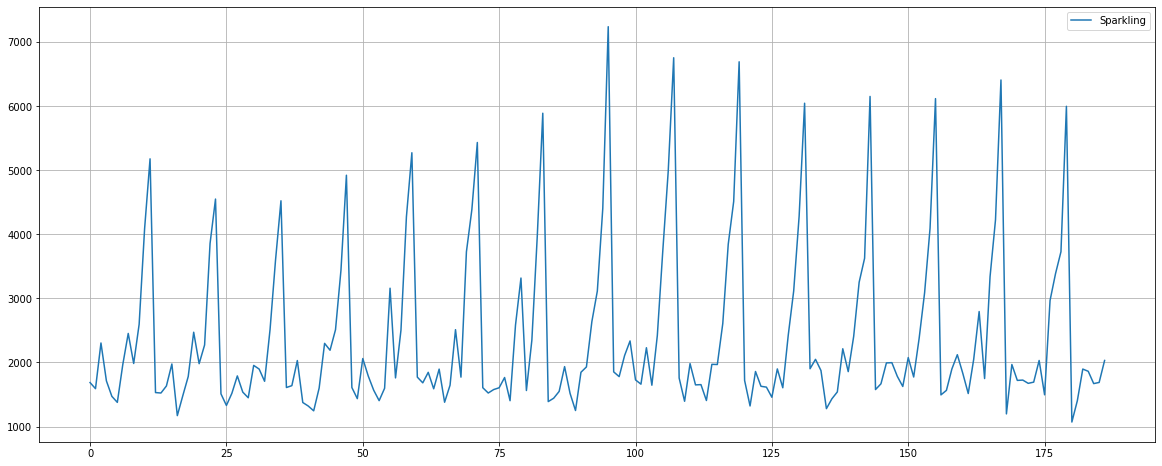

In [142]:
df_sparkling.plot(figsize=(20,8))
plt.grid();

In [143]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [144]:
df_sparkling['Time_Stamp']=date

In [145]:
df_sparkling.drop('YearMonth',axis=1,inplace=True)
df_sparkling.set_index('Time_Stamp',inplace=True)
df_sparkling.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [146]:
round(df_sparkling.describe(),3)

Sparkling
count    187.000
mean    2402.417
std     1295.112
min     1070.000
25%     1605.000
50%     1874.000
75%     2549.000
max     7242.000

In [147]:
df_sparkling.skew()

Sparkling    1.817612
dtype: float64

C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



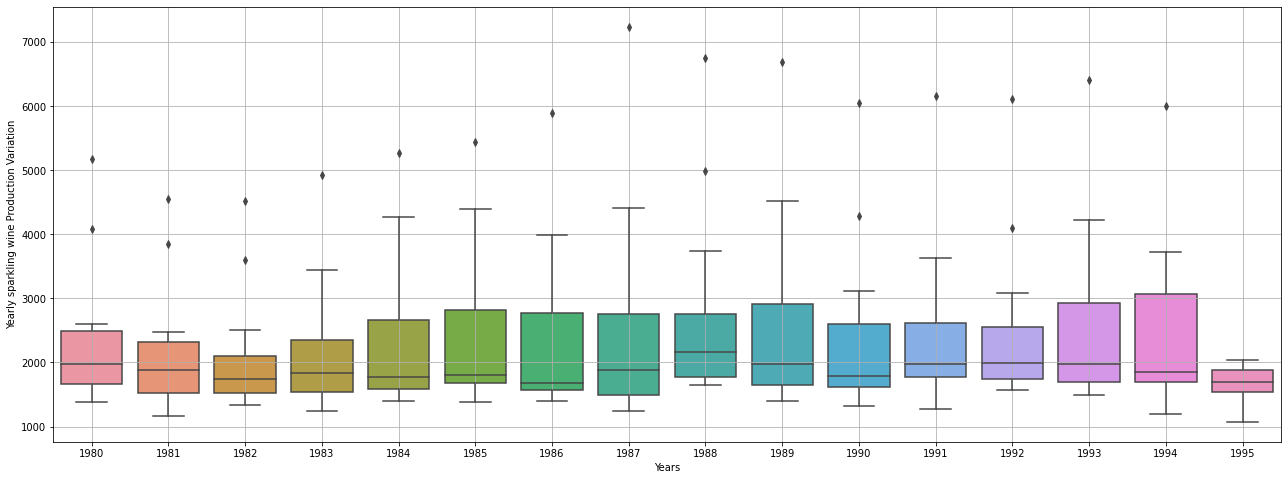

In [148]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_sparkling.index.year,df_sparkling.values[:,0], ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly sparkling wine Production Variation');

C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



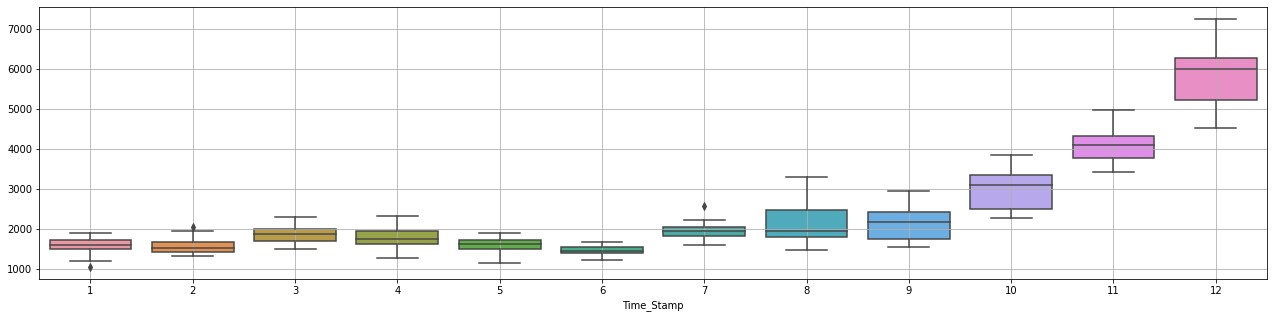

In [149]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(df_sparkling.index.month, df_sparkling.values[:,0], ax=ax,whis=1.5)
plt.grid();

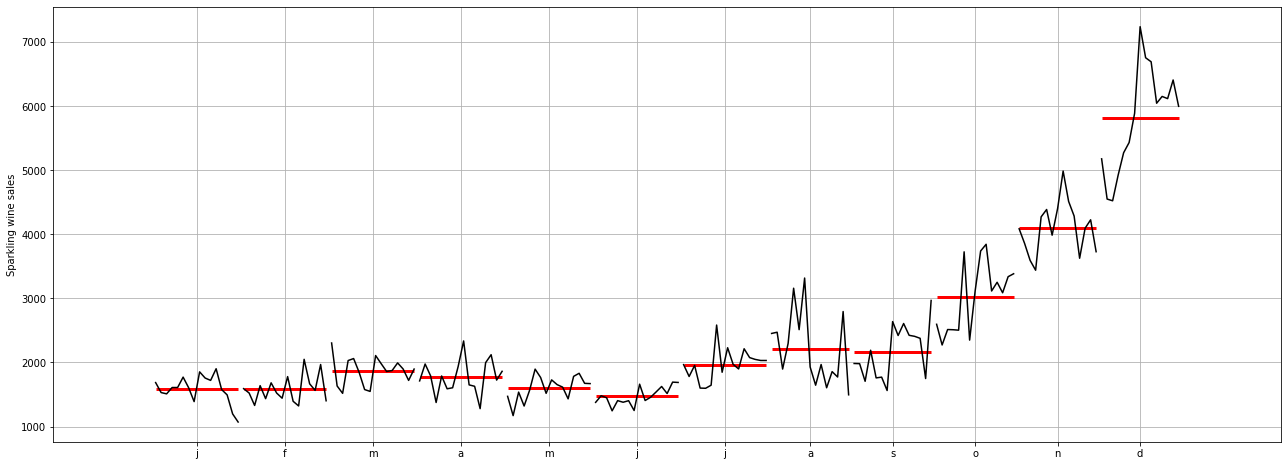

In [150]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df_sparkling,ylabel='Sparkling wine sales',ax=ax)
plt.grid();

In [151]:
Sales_per_month_sparkling = pd.pivot_table(df_sparkling, values = 'Sparkling', columns = df_sparkling.index.month_name(), index = df_sparkling.index.year)

In [152]:
Sales_per_month_sparkling

Time_Stamp   April  August  December  February  January    July    June  \
Time_Stamp                                                                
1980        1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981        1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982        1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983        1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984        1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985        1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986        1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987        1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988        2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989        1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990        1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991        1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0   
1992        1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0   
1993        2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0   
1994        1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0   
1995        1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0   

Time_Stamp   March     May  November  October  September  
Time_Stamp                                                
1980        2304.0  1471.0    4087.0   2596.0     1984.0  
1981        1633.0  1170.0    3857.0   2273.0     1981.0  
1982        1518.0  1537.0    3593.0   2514.0     1706.0  
1983        2030.0  1320.0    3440.0   2511.0     2191.0  
1984        2061.0  1567.0    4273.0   2504.0     1759.0  
1985        1846.0  1896.0    4388.0   3727.0     1771.0  
1986        1577.0  1765.0    3987.0   2349.0     1562.0  
1987        1548.0  1518.0    4405.0   3114.0     2638.0  
1988        2108.0  1728.0    4988.0   3740.0     2421.0  
1989        1982.0  1654.0    4514.0   3845.0     2608.0  
1990        1859.0  1615.0    4286.0   3116.0     2424.0  
1991        1874.0  1432.0    3627.0   3252.0     2408.0  
1992        1993.0  1783.0    4096.0   3088.0     2377.0  
1993        1898.0  1831.0    4227.0   3339.0     1749.0  
1994        1720.0  1674.0    3729.0   3385.0     2968.0  
1995        1897.0  1670.0       NaN      NaN        NaN

<AxesSubplot:xlabel='Time_Stamp'>

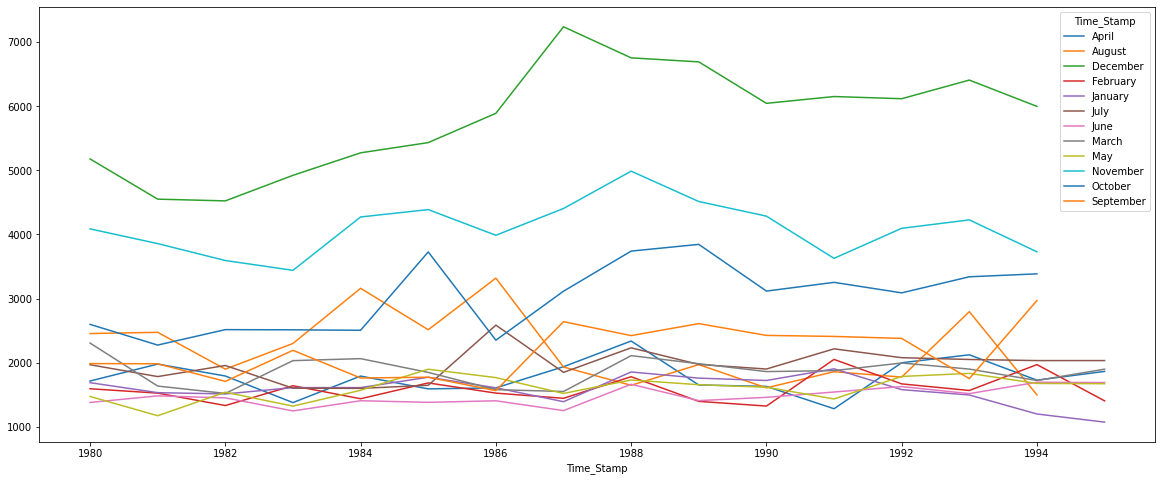

In [153]:
Sales_per_month_sparkling.plot()

In [154]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [155]:
decomp_sparkling_add=seasonal_decompose(df_sparkling,model='additive')
print(decomp_sparkling_add.trend)
print(decomp_sparkling_add.seasonal)
print(decomp_sparkling_add.resid)

Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
              ..
1995-03-31   NaN
1995-04-30   NaN
1995-05-31   NaN
1995-06-30   NaN
1995-07-31   NaN
Name: trend, Length: 187, dtype: float64
Time_Stamp
1980-01-31   -854.260599
1980-02-29   -830.350678
1980-03-31   -592.356630
1980-04-30   -658.490559
1980-05-31   -824.416154
                 ...    
1995-03-31   -592.356630
1995-04-30   -658.490559
1995-05-31   -824.416154
1995-06-30   -967.434011
1995-07-31   -465.502265
Name: seasonal, Length: 187, dtype: float64
Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
              ..
1995-03-31   NaN
1995-04-30   NaN
1995-05-31   NaN
1995-06-30   NaN
1995-07-31   NaN
Name: resid, Length: 187, dtype: float64


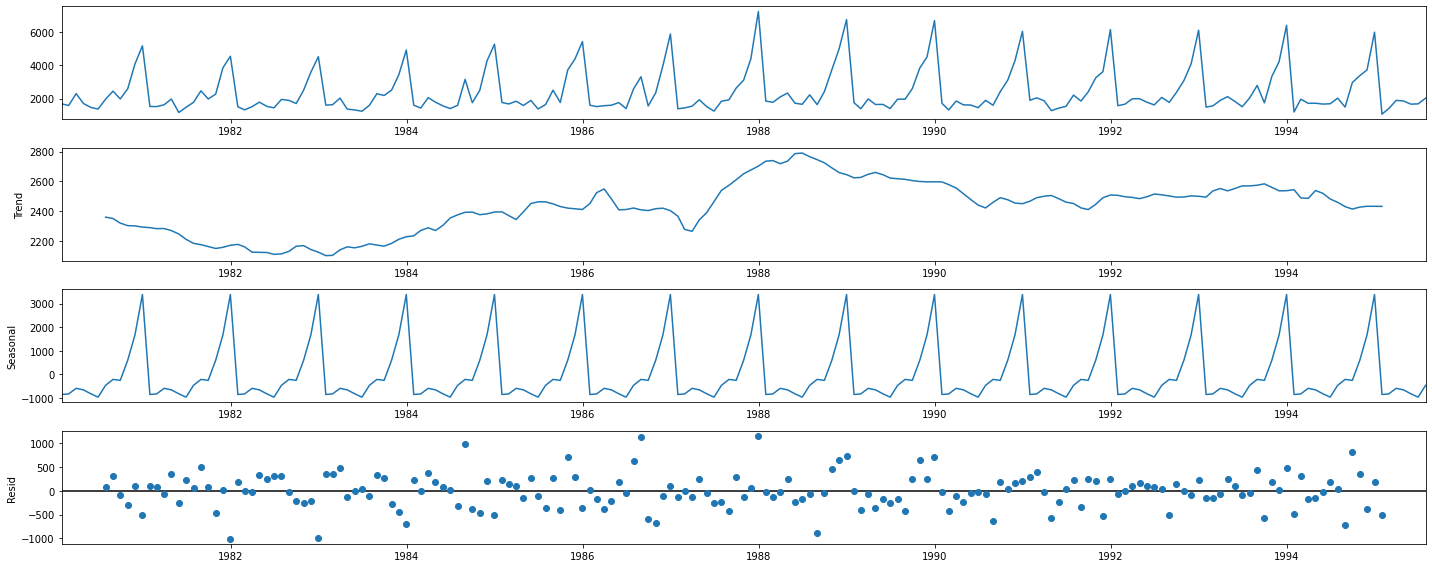

In [156]:
decomp_sparkling_add.plot();

In [157]:
decomp_sparkling_mul=seasonal_decompose(df_sparkling,model='multiplicative')

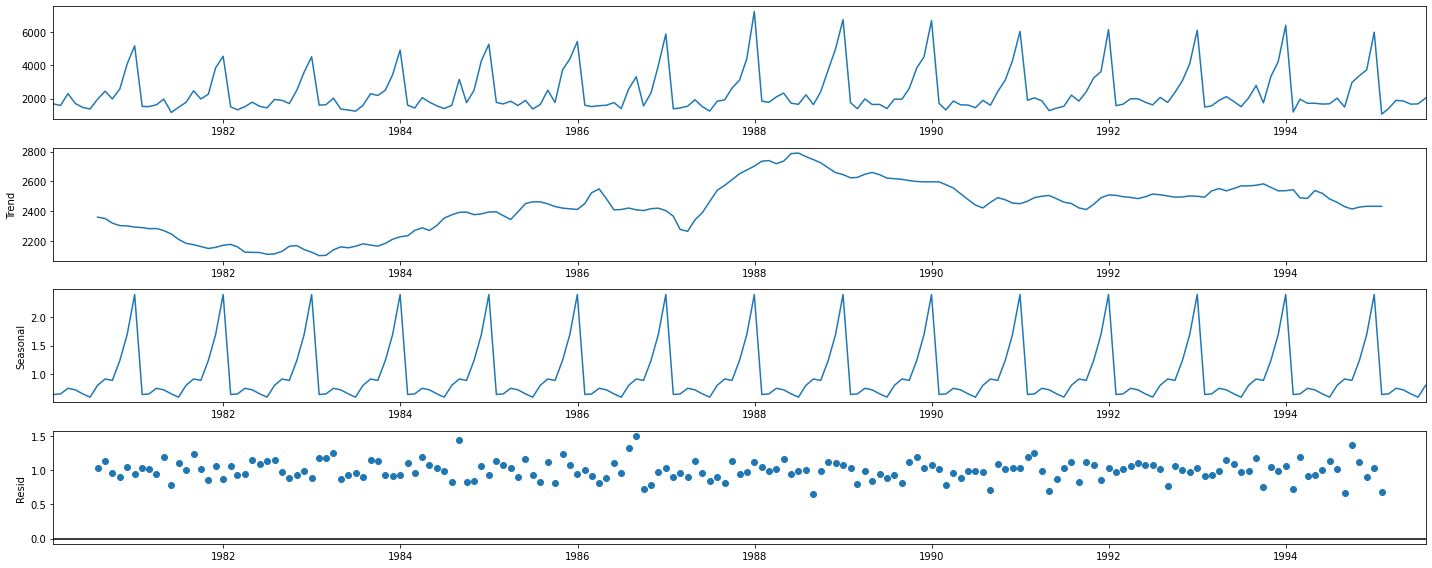

In [158]:
decomp_sparkling_mul.plot();

C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

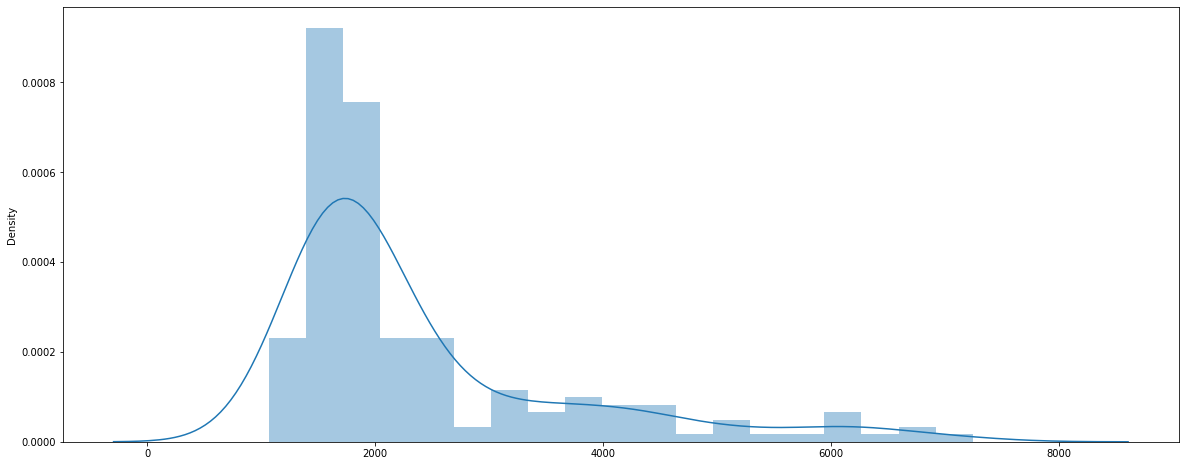

In [159]:
sns.distplot(df_sparkling)

In [160]:
df_rose=pd.read_csv("Rose.csv")

In [161]:
df_rose.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [162]:
df_rose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


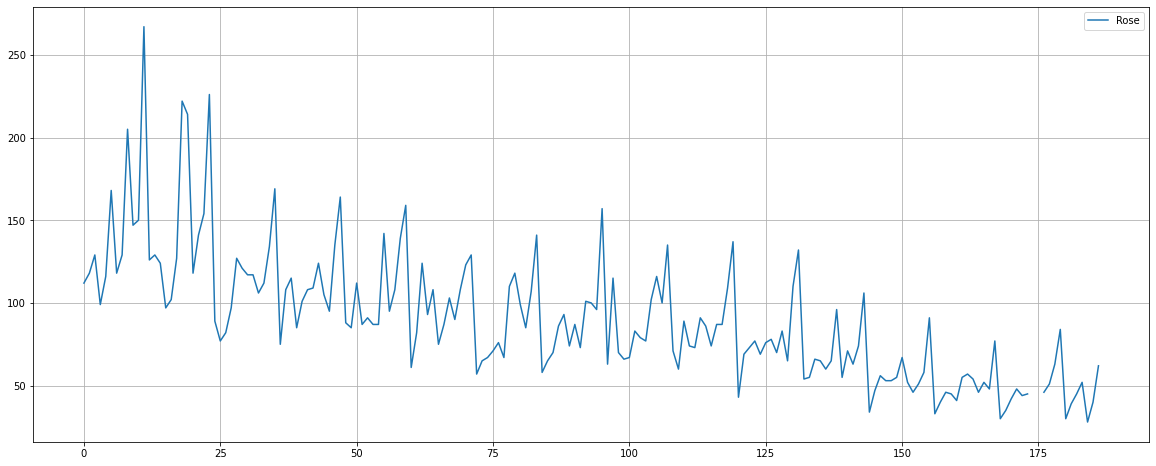

In [163]:
df_rose.plot(figsize=(20,8))
plt.grid();

In [164]:
df_rose['Time_Stamp']=date
df_rose.drop('YearMonth',axis=1,inplace=True)
df_rose.set_index('Time_Stamp',inplace=True)
df_rose.head()


Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [165]:
df_rose.isnull().sum()

Rose    2
dtype: int64

In [166]:
df_rose.fillna(df_rose.mean(),inplace=True)
df_rose.isnull().sum()


Rose    0
dtype: int64

In [167]:
round(df_rose.describe(),3)

Rose
count  187.000
mean    90.395
std     38.964
min     28.000
25%     63.000
50%     86.000
75%    111.000
max    267.000

In [168]:
df_rose.skew()

Rose    1.273183
dtype: float64

C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



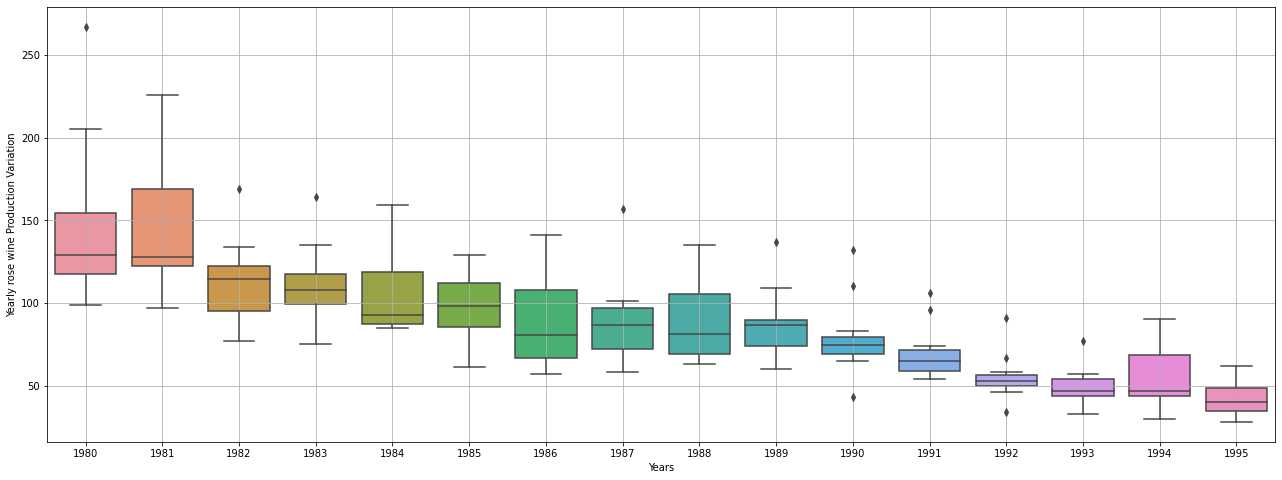

In [169]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_rose.index.year,df_rose.values[:,0], ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly rose wine Production Variation');

C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



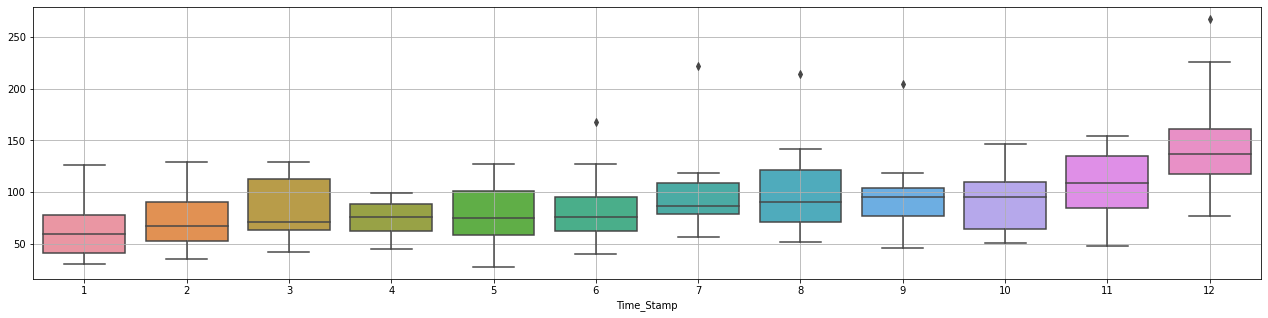

In [170]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(df_rose.index.month, df_rose.values[:,0], ax=ax,whis=1.5)
plt.grid();

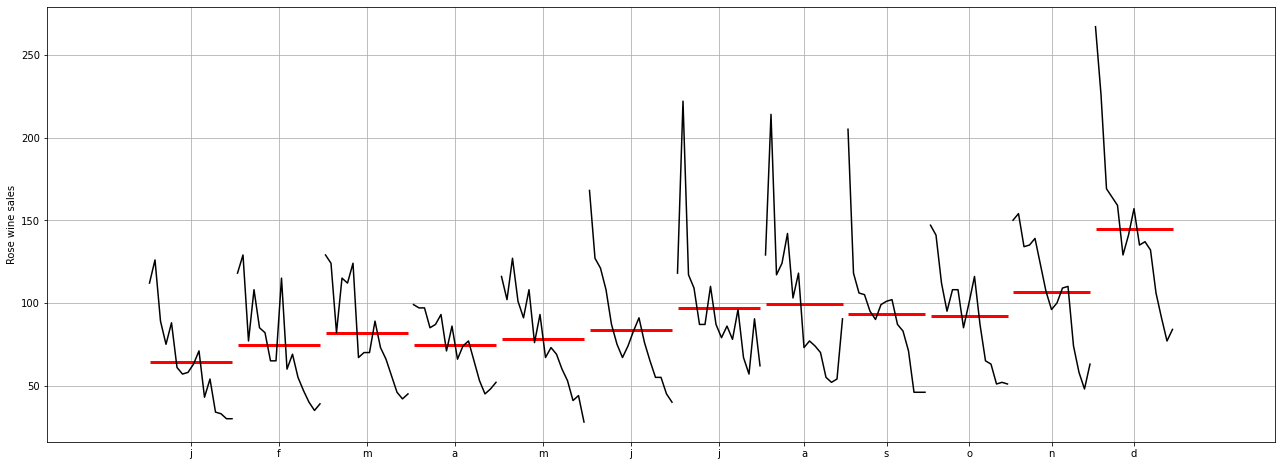

In [171]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df_rose,ylabel='Rose wine sales',ax=ax)
plt.grid();

In [172]:
Sales_per_month = pd.pivot_table(df_rose, values = 'Rose', columns = df_rose.index.month, index = df_rose.index.year)

In [173]:
Sales_per_month

Time_Stamp     1      2      3     4      5      6           7           8   \
Time_Stamp                                                                    
1980        112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981        126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982         89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983         75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984         88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985         61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986         57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987         58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988         63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989         71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990         43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991         54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992         34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993         33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994         30.0   35.0   42.0  48.0   44.0   45.0   90.394595   90.394595   
1995         30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

Time_Stamp     9      10     11     12  
Time_Stamp                              
1980        205.0  147.0  150.0  267.0  
1981        118.0  141.0  154.0  226.0  
1982        106.0  112.0  134.0  169.0  
1983        105.0   95.0  135.0  164.0  
1984         95.0  108.0  139.0  159.0  
1985         90.0  108.0  123.0  129.0  
1986         99.0   85.0  107.0  141.0  
1987        101.0  100.0   96.0  157.0  
1988        102.0  116.0  100.0  135.0  
1989         87.0   87.0  109.0  137.0  
1990         83.0   65.0  110.0  132.0  
1991         71.0   63.0   74.0  106.0  
1992         46.0   51.0   58.0   91.0  
1993         46.0   52.0   48.0   77.0  
1994         46.0   51.0   63.0   84.0  
1995          NaN    NaN    NaN    NaN

<AxesSubplot:xlabel='Time_Stamp'>

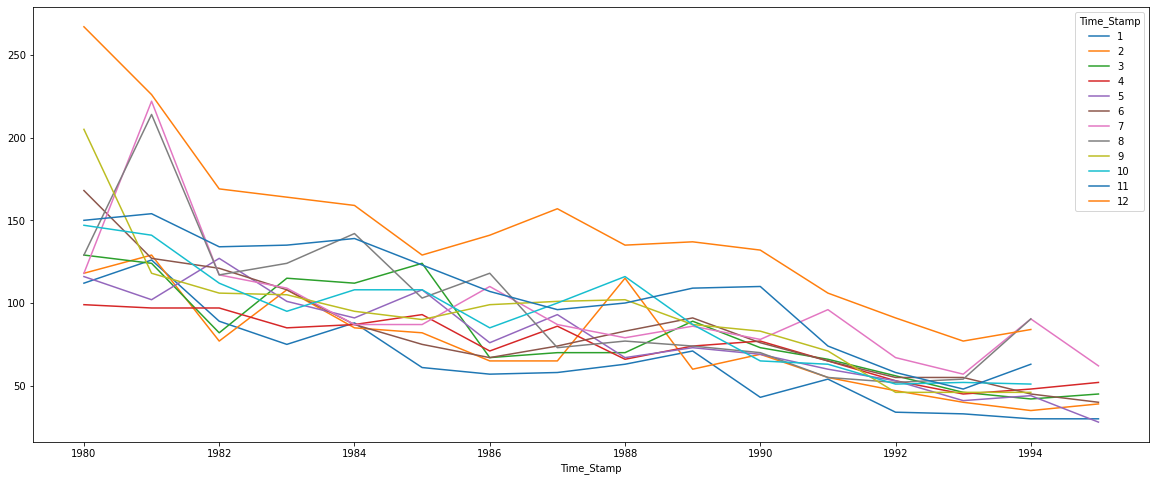

In [174]:
Sales_per_month.plot()

C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

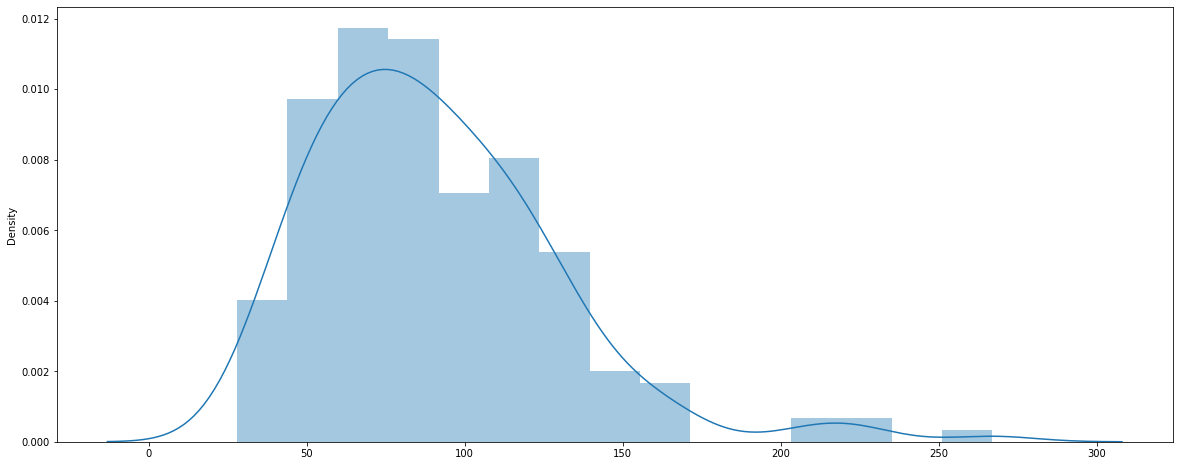

In [175]:
sns.distplot(df_rose)

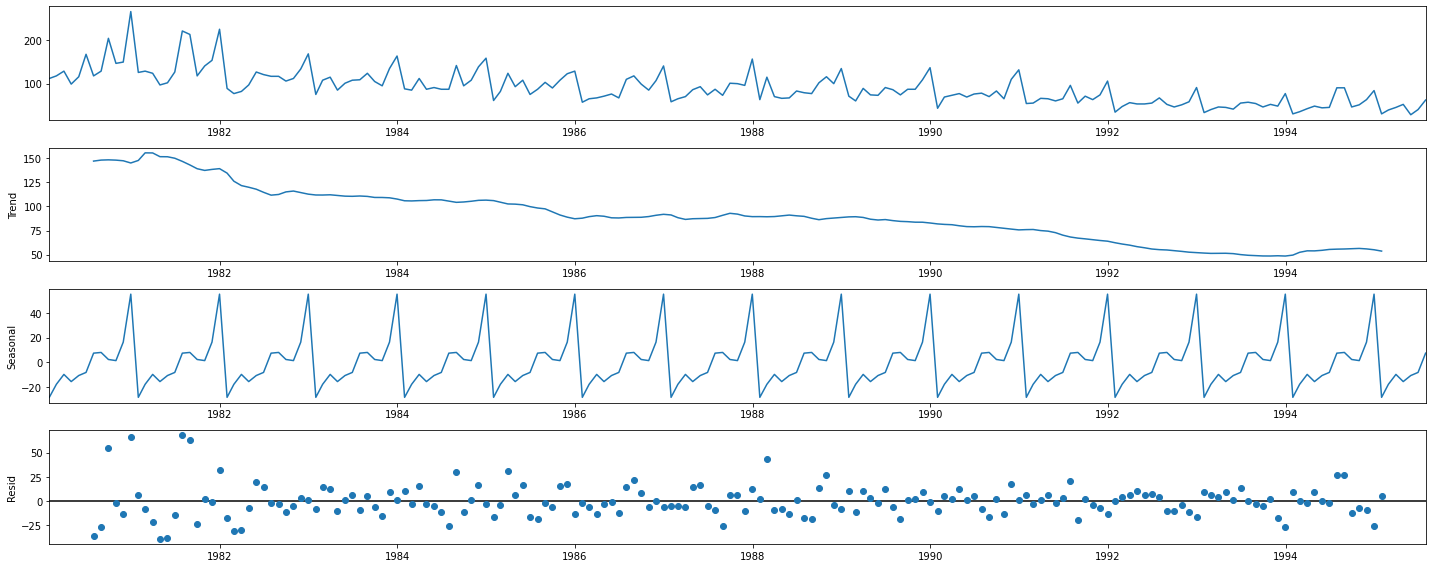

In [176]:
decompose_rose_add=seasonal_decompose(df_rose,model='additive')

decompose_rose_add.plot();


In [177]:
decompose_rose_mul=seasonal_decompose(df_rose,model='multiplicative')

decompose_rose_mul.plot();


# Split the data into training and test. The test data should start in 1991.

In [178]:
train_sparkling = df_sparkling[df_sparkling.index<='1991'] 
test_sparkling = df_sparkling[df_sparkling.index>'1991']
train_rose = df_rose[df_rose.index<='1991'] 
test_rose = df_rose[df_rose.index>'1991']

In [179]:
plt.plot(train_sparkling,label='Train')
plt.plot(test_sparkling,label='Test')
plt.legend()
plt.grid()
plt.title(' Train and test data for Sparkling Data set ')

Text(0.5, 1.0, ' Train and test data for Sparkling Data set ')

Text(0.5, 1.0, 'Train and test data for Rose Data set ')

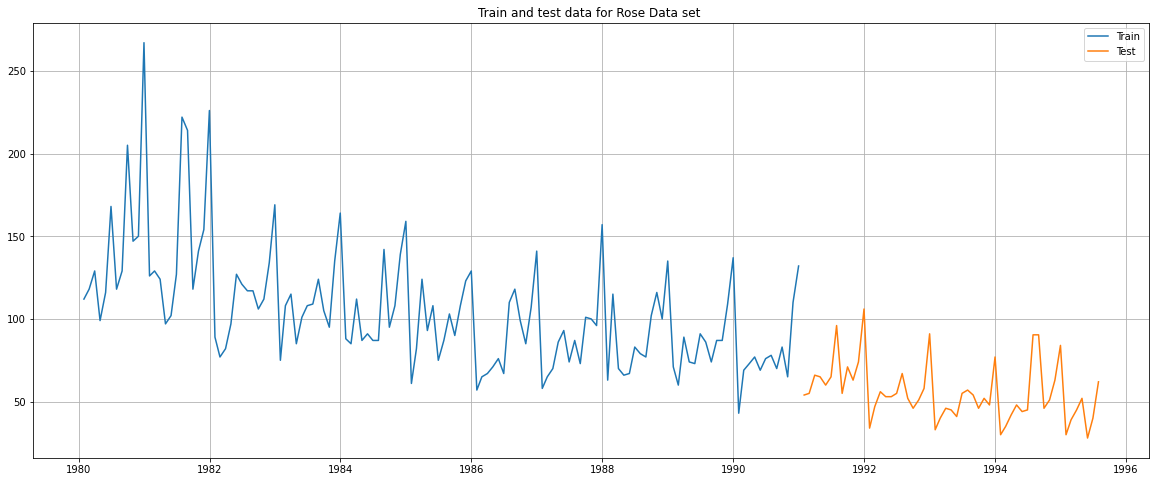

In [180]:
plt.plot(train_rose,label='Train')
plt.plot(test_rose,label='Test')
plt.legend()
plt.grid()
plt.title('Train and test data for Rose Data set ')

# Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.

In [181]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt


## SS for Sparkling

In [182]:
model_SES_sparkling=SimpleExpSmoothing(train_sparkling,initialization_method='estimated')

C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



In [183]:
model_ses_sparkling_autofit=model_SES_sparkling.fit(optimized=True)

C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [184]:

model_ses_sparkling_autofit.params

{'smoothing_level': 0.07029120765764557,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1764.0137060346985,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [185]:
sparkling_SES_predict=model_ses_sparkling_autofit.forecast(steps=len(test_rose))
sparkling_SES_predict

1991-01-31    2804.675124
1991-02-28    2804.675124
1991-03-31    2804.675124
1991-04-30    2804.675124
1991-05-31    2804.675124
1991-06-30    2804.675124
1991-07-31    2804.675124
1991-08-31    2804.675124
1991-09-30    2804.675124
1991-10-31    2804.675124
1991-11-30    2804.675124
1991-12-31    2804.675124
1992-01-31    2804.675124
1992-02-29    2804.675124
1992-03-31    2804.675124
1992-04-30    2804.675124
1992-05-31    2804.675124
1992-06-30    2804.675124
1992-07-31    2804.675124
1992-08-31    2804.675124
1992-09-30    2804.675124
1992-10-31    2804.675124
1992-11-30    2804.675124
1992-12-31    2804.675124
1993-01-31    2804.675124
1993-02-28    2804.675124
1993-03-31    2804.675124
1993-04-30    2804.675124
1993-05-31    2804.675124
1993-06-30    2804.675124
1993-07-31    2804.675124
1993-08-31    2804.675124
1993-09-30    2804.675124
1993-10-31    2804.675124
1993-11-30    2804.675124
1993-12-31    2804.675124
1994-01-31    2804.675124
1994-02-28    2804.675124
1994-03-31  

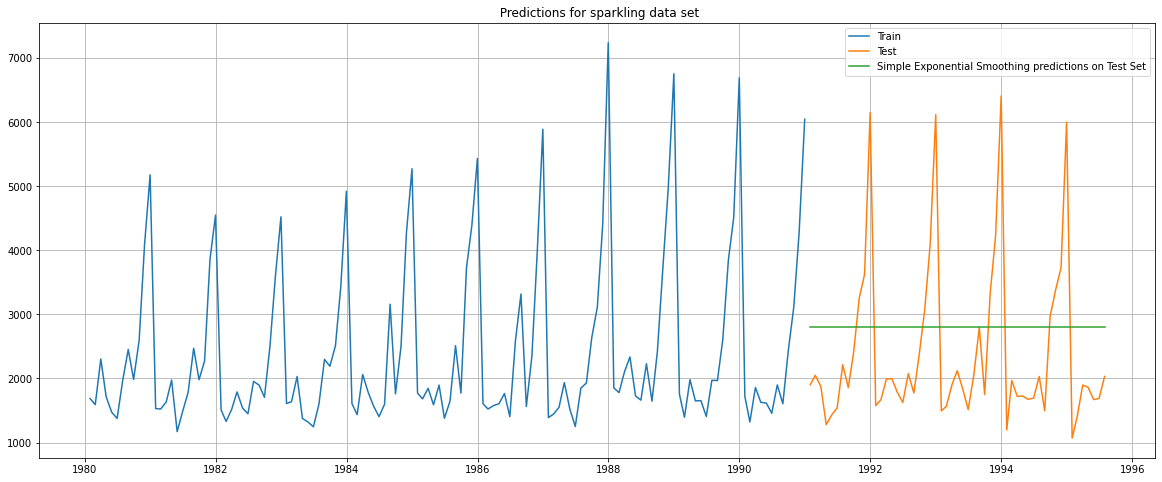

In [186]:
plt.plot(train_sparkling, label='Train')
plt.plot(test_sparkling, label='Test')

plt.plot(sparkling_SES_predict, label= 'Simple Exponential Smoothing predictions on Test Set')

plt.legend()

plt.grid()
plt.title(' Predictions for sparkling data set');

In [187]:
rmse_ses_sparkling=mean_squared_error(test_sparkling.values,sparkling_SES_predict.values,squared=False)
rmse_ses_sparkling

1338.0083844916467

# SS FOR ROSE

In [188]:
model_SES_rose=SimpleExpSmoothing(train_rose,initialization_method='estimated')

C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



In [189]:
model_SES_autofit=model_SES_rose.fit(optimized=True)
model_SES_autofit.params
rose_SES_predict=model_SES_autofit.forecast(steps=len(test_rose))
rose_SES_predict

1991-01-31    87.104997
1991-02-28    87.104997
1991-03-31    87.104997
1991-04-30    87.104997
1991-05-31    87.104997
1991-06-30    87.104997
1991-07-31    87.104997
1991-08-31    87.104997
1991-09-30    87.104997
1991-10-31    87.104997
1991-11-30    87.104997
1991-12-31    87.104997
1992-01-31    87.104997
1992-02-29    87.104997
1992-03-31    87.104997
1992-04-30    87.104997
1992-05-31    87.104997
1992-06-30    87.104997
1992-07-31    87.104997
1992-08-31    87.104997
1992-09-30    87.104997
1992-10-31    87.104997
1992-11-30    87.104997
1992-12-31    87.104997
1993-01-31    87.104997
1993-02-28    87.104997
1993-03-31    87.104997
1993-04-30    87.104997
1993-05-31    87.104997
1993-06-30    87.104997
1993-07-31    87.104997
1993-08-31    87.104997
1993-09-30    87.104997
1993-10-31    87.104997
1993-11-30    87.104997
1993-12-31    87.104997
1994-01-31    87.104997
1994-02-28    87.104997
1994-03-31    87.104997
1994-04-30    87.104997
1994-05-31    87.104997
1994-06-30    87

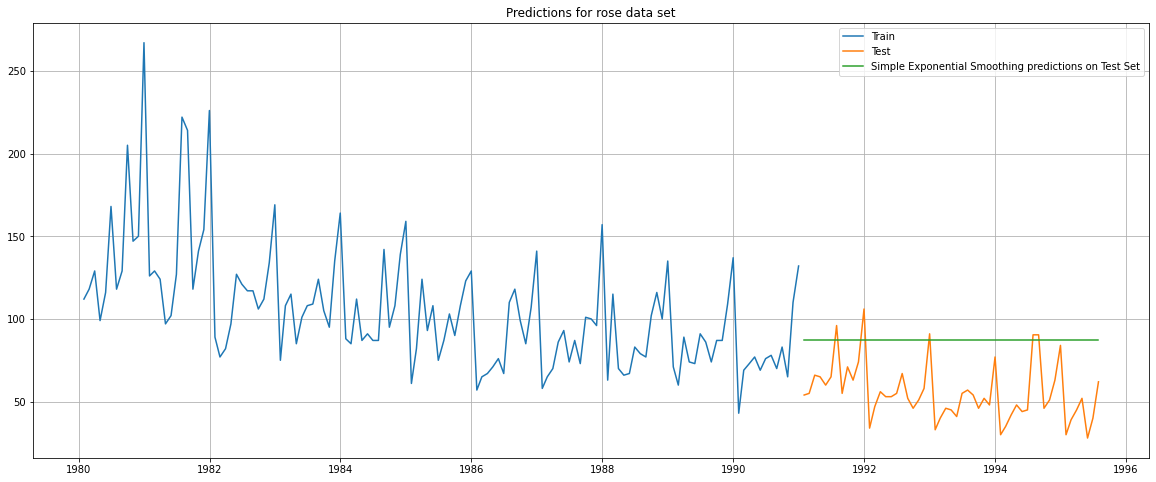

In [190]:
plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')

plt.plot(rose_SES_predict, label='Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Predictions for rose data set');

In [191]:
rmse_ses_rose=mean_squared_error(test_rose.values,rose_SES_predict.values,squared=False)
rmse_ses_rose

35.93621071651502

## DES for Sparkling

In [199]:
model_DES_sparkling = Holt(train_sparkling,initialization_method='estimated')
# Fitting the model
model_DES_sparkling = model_DES_sparkling.fit()

print('')
print('Double Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES_sparkling.params)


Double Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999991, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



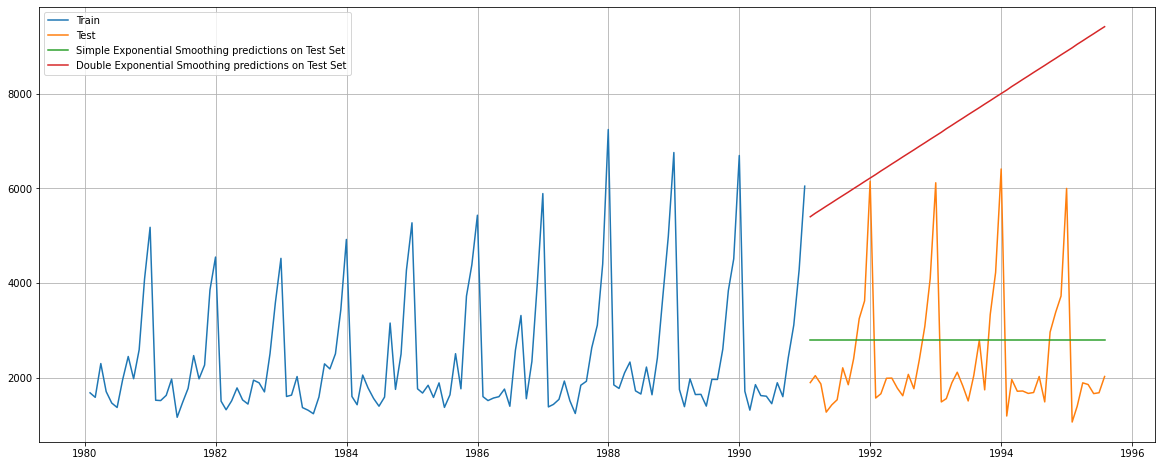

In [200]:
model_DES_sparkling_predict=model_DES_sparkling.forecast(len(test_sparkling))
plt.plot(train_sparkling, label='Train')
plt.plot(test_sparkling, label='Test')

plt.plot(sparkling_SES_predict, label='Simple Exponential Smoothing predictions on Test Set')
plt.plot(model_DES_sparkling_predict, label='Double Exponential Smoothing predictions on Test Set')


plt.legend()

plt.grid()


In [201]:
rmse_des_sparkling=mean_squared_error(test_sparkling.values,model_DES_sparkling_predict.values,squared=False)
rmse_des_sparkling

5291.8798332269125

# DES FOR ROSE

In [202]:
model_DES_rose = Holt(train_rose,initialization_method='estimated')
# Fitting the model
model_DES_rose = model_DES_rose.fit()

print('')
print('Double Smoothing Estimated Parameters ==')
print('')
print(model_DES_rose.params)


Double Smoothing Estimated Parameters ==

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 1.6610391146660035e-10, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81553690867275, 'initial_trend': -0.4943781897068274, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



In [203]:
model_DES_predict_rose=model_DES_rose.forecast(len(test_rose))
model_DES_predict_rose

1991-01-31    72.063238
1991-02-28    71.568859
1991-03-31    71.074481
1991-04-30    70.580103
1991-05-31    70.085725
1991-06-30    69.591347
1991-07-31    69.096969
1991-08-31    68.602590
1991-09-30    68.108212
1991-10-31    67.613834
1991-11-30    67.119456
1991-12-31    66.625078
1992-01-31    66.130699
1992-02-29    65.636321
1992-03-31    65.141943
1992-04-30    64.647565
1992-05-31    64.153187
1992-06-30    63.658808
1992-07-31    63.164430
1992-08-31    62.670052
1992-09-30    62.175674
1992-10-31    61.681296
1992-11-30    61.186918
1992-12-31    60.692539
1993-01-31    60.198161
1993-02-28    59.703783
1993-03-31    59.209405
1993-04-30    58.715027
1993-05-31    58.220648
1993-06-30    57.726270
1993-07-31    57.231892
1993-08-31    56.737514
1993-09-30    56.243136
1993-10-31    55.748757
1993-11-30    55.254379
1993-12-31    54.760001
1994-01-31    54.265623
1994-02-28    53.771245
1994-03-31    53.276866
1994-04-30    52.782488
1994-05-31    52.288110
1994-06-30    51

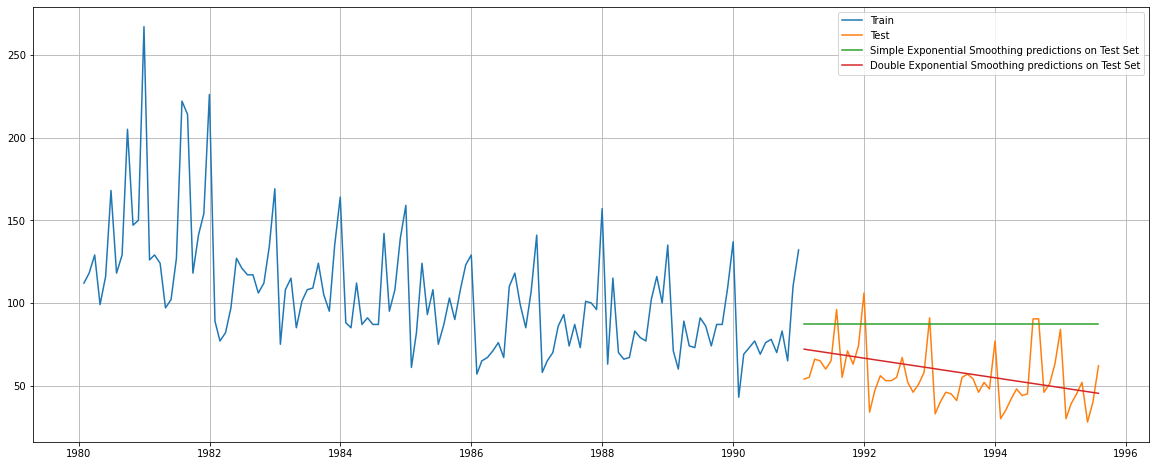

In [204]:
plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')

plt.plot(rose_SES_predict, label='Simple Exponential Smoothing predictions on Test Set')
plt.plot(model_DES_predict_rose, label='Double Exponential Smoothing predictions on Test Set')


plt.legend()

plt.grid()


In [205]:
rmse_des_rose=mean_squared_error(test_rose.values,model_DES_predict_rose.values,squared=False)
rmse_des_rose

16.979407626324168

# TES ADDITIVE SPARLKING

In [331]:
model_TES_sparkling = ExponentialSmoothing(train_sparkling,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES_sparkling = model_TES_sparkling.fit()

print('')
print('Holt Winters model Exponential Smoothing Estimated Parameters ')
print('')
print(model_TES_sparkling.params)

C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.




Holt Winters model Exponential Smoothing Estimated Parameters 

{'smoothing_level': 0.11127217746964548, 'smoothing_trend': 0.012360783178126748, 'smoothing_seasonal': 0.46071776538894016, 'damping_trend': nan, 'initial_level': 2356.578364436942, 'initial_trend': -0.018474239476475418, 'initial_seasons': array([-636.23349217, -722.98352055, -398.6435547 , -473.43067518,
       -808.42508553, -815.35030575, -384.23066985,   72.99524975,
       -237.44267238,  272.32595851, 1541.37820976, 2590.07753817]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [332]:
HW_predict_sparkling=model_TES_sparkling.forecast(len(test_sparkling))
HW_predict_sparkling

1991-01-31    1490.574551
1991-02-28    1204.714462
1991-03-31    1688.941256
1991-04-30    1551.450972
1991-05-31    1461.440602
1991-06-30    1278.907350
1991-07-31    1805.164222
1991-08-31    1679.251604
1991-09-30    2315.687875
1991-10-31    3225.309145
1991-11-30    4299.652613
1991-12-31    6411.161656
1992-01-31    1483.296915
1992-02-29    1197.436826
1992-03-31    1681.663620
1992-04-30    1544.173336
1992-05-31    1454.162966
1992-06-30    1271.629714
1992-07-31    1797.886586
1992-08-31    1671.973968
1992-09-30    2308.410239
1992-10-31    3218.031509
1992-11-30    4292.374977
1992-12-31    6403.884020
1993-01-31    1476.019279
1993-02-28    1190.159190
1993-03-31    1674.385984
1993-04-30    1536.895700
1993-05-31    1446.885330
1993-06-30    1264.352078
1993-07-31    1790.608950
1993-08-31    1664.696332
1993-09-30    2301.132603
1993-10-31    3210.753873
1993-11-30    4285.097341
1993-12-31    6396.606384
1994-01-31    1468.741643
1994-02-28    1182.881554
1994-03-31  

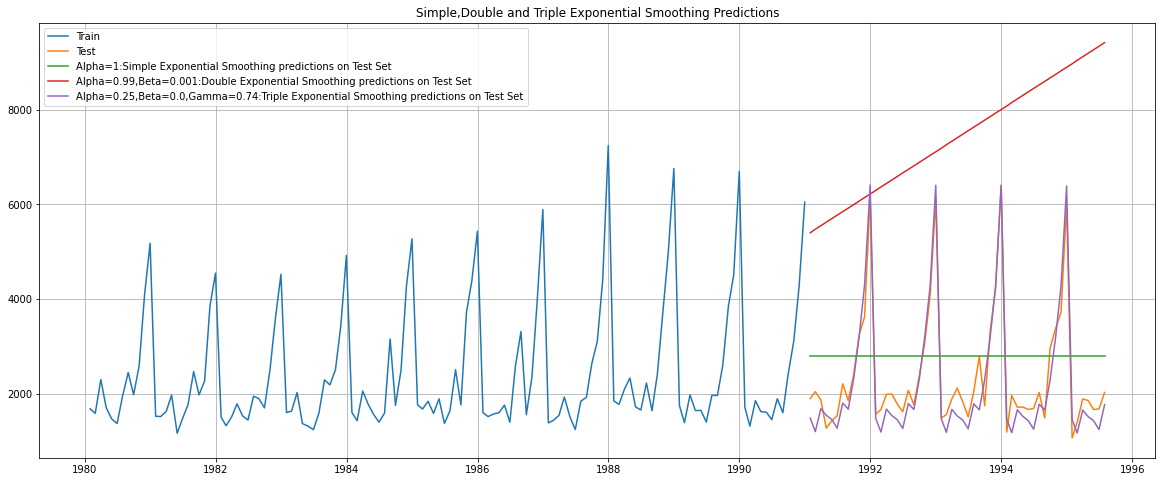

In [333]:
plt.plot(train_sparkling, label='Train')
plt.plot(test_sparkling, label='Test')

plt.plot(sparkling_SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(model_DES_sparkling_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(HW_predict_sparkling, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [334]:
rmse_tse_sparkling=mean_squared_error(test_sparkling.values,HW_predict_sparkling.values,squared=False)
rmse_tse_sparkling

378.6260083329619

# TSE ADDITIVE ROSE

In [335]:
model_TES_rose = ExponentialSmoothing(train_rose,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES_rose = model_TES_rose.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_rose.params)

C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.




==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08872764725999983, 'smoothing_trend': 9.006425383910208e-06, 'smoothing_seasonal': 0.00030220468692033857, 'damping_trend': nan, 'initial_level': 146.86313344217183, 'initial_trend': -0.54920783338383, 'initial_seasons': array([-31.29615978, -18.85729122, -10.84129035, -21.39327001,
       -12.61174453,  -7.17892692,   2.72463253,   8.78522404,
         4.87498352,   3.01144155,  21.09509348,  63.26062685]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [336]:
HW_rose_predict=model_TES_rose.forecast(len(test_rose))
HW_rose_predict

1991-01-31     42.493878
1991-02-28     54.383286
1991-03-31     61.850018
1991-04-30     50.748583
1991-05-31     58.981025
1991-06-30     63.864702
1991-07-31     73.219078
1991-08-31     78.730554
1991-09-30     74.270845
1991-10-31     71.857980
1991-11-30     89.392486
1991-12-31    131.011001
1992-01-31     35.903382
1992-02-29     47.792789
1992-03-31     55.259522
1992-04-30     44.158086
1992-05-31     52.390528
1992-06-30     57.274205
1992-07-31     66.628582
1992-08-31     72.140058
1992-09-30     67.680349
1992-10-31     65.267484
1992-11-30     82.801990
1992-12-31    124.420505
1993-01-31     29.312885
1993-02-28     41.202293
1993-03-31     48.669026
1993-04-30     37.567590
1993-05-31     45.800032
1993-06-30     50.683709
1993-07-31     60.038085
1993-08-31     65.549561
1993-09-30     61.089852
1993-10-31     58.676987
1993-11-30     76.211493
1993-12-31    117.830009
1994-01-31     22.722389
1994-02-28     34.611797
1994-03-31     42.078529
1994-04-30     30.977093


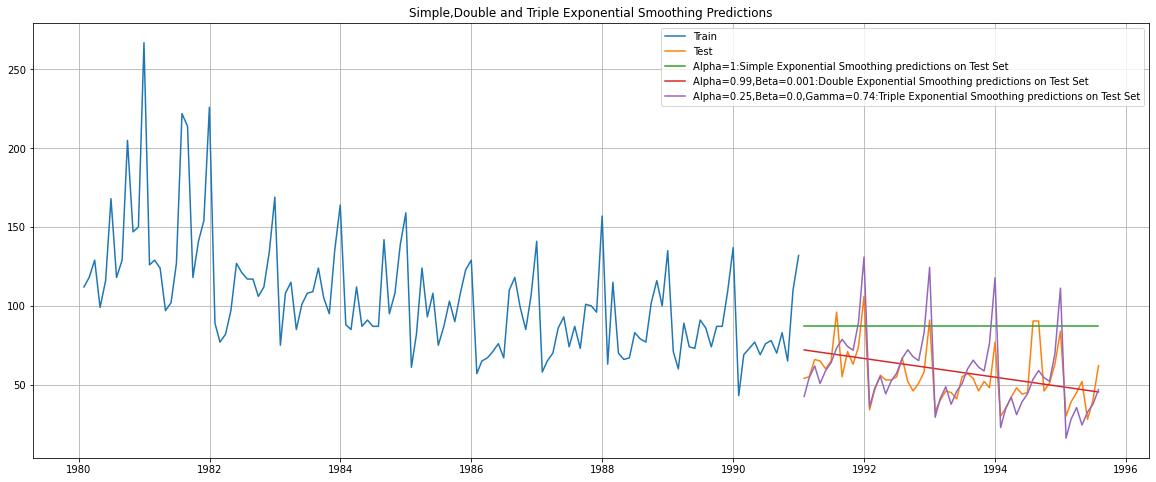

In [337]:
plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')

plt.plot(rose_SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(model_DES_predict_rose, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(HW_rose_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [338]:
rmse_tse_rose=mean_squared_error(test_rose.values,HW_rose_predict.values,squared=False)
rmse_tse_rose

15.543482483216644

# TSE MULTIPLICATIVE SPARKLING

In [340]:
model_TES_mulspark = ExponentialSmoothing(train_sparkling,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_mulspark = model_TES_mulspark.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_mulspark.params)

C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.




==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11101523064586813, 'smoothing_trend': 0.0493150519338607, 'smoothing_seasonal': 0.3624464792152574, 'damping_trend': nan, 'initial_level': 2356.4981157471807, 'initial_trend': -9.804740061967985, 'initial_seasons': array([0.71351261, 0.68262962, 0.90447098, 0.80523467, 0.65565848,
       0.65382021, 0.88609683, 1.13334681, 0.91877227, 1.21174825,
       1.87063097, 2.37421776]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [341]:
model_TES_mulspark_predict=model_TES_mulspark.forecast(len(test_sparkling))
model_TES_mulspark_predict

1991-01-31    1587.921914
1991-02-28    1356.650344
1991-03-31    1763.350219
1991-04-30    1656.523868
1991-05-31    1542.386219
1991-06-30    1355.480857
1991-07-31    1854.708560
1991-08-31    1820.665822
1991-09-30    2277.675614
1991-10-31    3123.118775
1991-11-30    4130.016056
1991-12-31    5893.139956
1992-01-31    1539.025473
1992-02-29    1314.767912
1992-03-31    1708.771760
1992-04-30    1605.119264
1992-05-31    1494.399399
1992-06-30    1313.199426
1992-07-31    1796.703973
1992-08-31    1763.577111
1992-09-30    2206.069820
1992-10-31    3024.675950
1992-11-30    3999.492295
1992-12-31    5706.403171
1993-01-31    1490.129033
1993-02-28    1272.885480
1993-03-31    1654.193301
1993-04-30    1553.714661
1993-05-31    1446.412578
1993-06-30    1270.917996
1993-07-31    1738.699385
1993-08-31    1706.488400
1993-09-30    2134.464026
1993-10-31    2926.233125
1993-11-30    3868.968534
1993-12-31    5519.666385
1994-01-31    1441.232592
1994-02-28    1231.003048
1994-03-31  

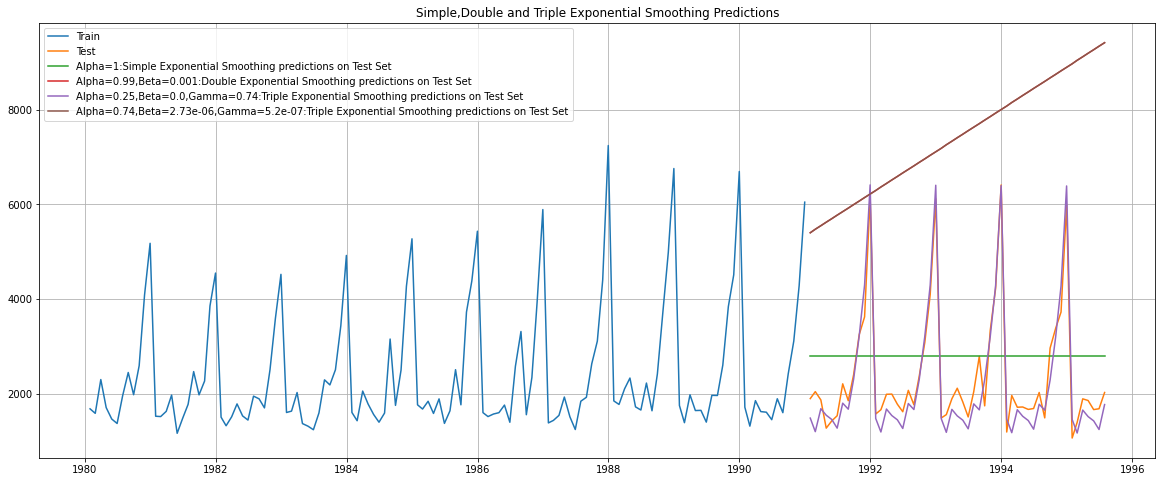

In [342]:
plt.plot(train_sparkling, label='Train')
plt.plot(test_sparkling, label='Test')

plt.plot(sparkling_SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(model_DES_sparkling_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(HW_predict_sparkling, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(model_DES_sparkling_predict, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');


In [343]:
rmse_mulspark=mean_squared_error(test_rose.values,model_TES_mulspark_predict.values,squared=False)
rmse_mulspark

2408.798909524524

# TSE MULTIPLICATIVE ROSE

In [345]:
# Initializing the Double Exponential Smoothing Model
model_TES_mulrose = ExponentialSmoothing(train_rose,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_mulrose = model_TES_mulrose.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_mulrose.params)

C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.




==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07580378115501289, 'smoothing_trend': 0.04082731831671567, 'smoothing_seasonal': 0.0008792861232047841, 'damping_trend': nan, 'initial_level': 163.87796236599962, 'initial_trend': -0.9559811417358383, 'initial_seasons': array([0.68432572, 0.77587329, 0.84828062, 0.74119702, 0.83386517,
       0.90761668, 0.99838676, 1.06374484, 1.00486364, 0.9847888 ,
       1.14803087, 1.58276201]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [346]:
model_TES_mulrose_predict=model_TES_mulrose.forecast(len(test_rose))
model_TES_mulrose_predict

1991-01-31     56.036899
1991-02-28     63.349325
1991-03-31     69.021015
1991-04-30     60.120355
1991-05-31     67.380193
1991-06-30     73.053471
1991-07-31     80.089604
1991-08-31     85.028307
1991-09-30     80.074762
1991-10-31     78.207855
1991-11-30     90.863516
1991-12-31    124.781088
1992-01-31     53.763924
1992-02-29     60.771028
1992-03-31     66.202322
1992-04-30     57.656765
1992-05-31     64.609652
1992-06-30     70.039327
1992-07-31     76.773753
1992-08-31     81.495797
1992-09-30     76.736490
1992-10-31     74.936046
1992-11-30     87.048962
1992-12-31    119.524246
1993-01-31     51.490950
1993-02-28     58.192732
1993-03-31     63.383629
1993-04-30     55.193175
1993-05-31     61.839110
1993-06-30     67.025183
1993-07-31     73.457901
1993-08-31     77.963287
1993-09-30     73.398218
1993-10-31     71.664238
1993-11-30     83.234408
1993-12-31    114.267403
1994-01-31     49.217976
1994-02-28     55.614435
1994-03-31     60.564937
1994-04-30     52.729585


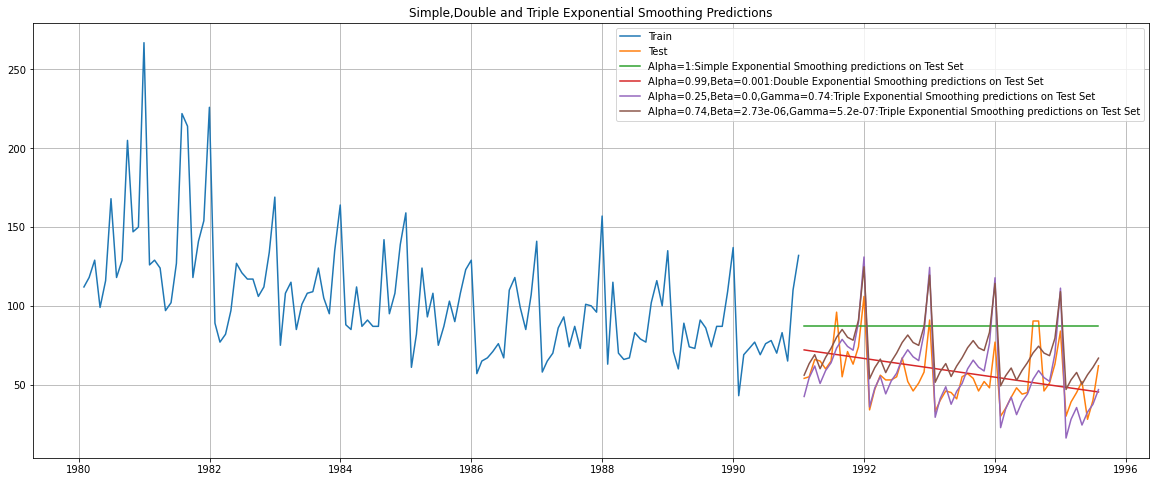

In [347]:
plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')

plt.plot(rose_SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(model_DES_predict_rose, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(HW_rose_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(model_TES_mulrose_predict, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [348]:
rmse_mulrose=mean_squared_error(test_rose.values,model_TES_mulrose_predict.values,squared=False)

rmse_mulrose

19.029100042777717

In [339]:

train_sparkling.shape

(132, 1)

In [210]:
train_rose.shape

(132, 1)

In [211]:
train_time_spark = [i+1 for i in range(len(train_sparkling))]
test_time_spark = [i+134 for i in range(len(test_sparkling))]
print('Training Time instance','\n',train_time_spark)
print('Test Time instance','\n',test_time_spark)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188]


# Linear Regression

In [212]:
lr_train_spark = train_sparkling.copy()
lr_test_spark = test_sparkling.copy()

In [213]:
lr_train_spark['time'] = train_time_spark
lr_test_spark['time'] = test_time_spark
print('First few rows of Training Data','\n',lr_train_spark.head(),'\n')
print('Last few rows of Training Data','\n',lr_train_spark.tail(),'\n')
print('First few rows of Test Data','\n',lr_test_spark.head(),'\n')
print('Last few rows of Test Data','\n',lr_test_spark.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   134
1991-02-28       2049   135
1991-03-31       1874   136
1991-04-30       1279   137
1991-05-31       1432   138 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   184
1995-04-30       1862   185
1995-05-31       1670   186
1995-06-30       1688   187
1995-07-31       2031   188 



In [214]:
from sklearn.linear_model import LinearRegression

In [215]:
LR=LinearRegression()

In [216]:
LR.fit(lr_train_spark[['time']],lr_train_spark['Sparkling'].values)

LinearRegression()

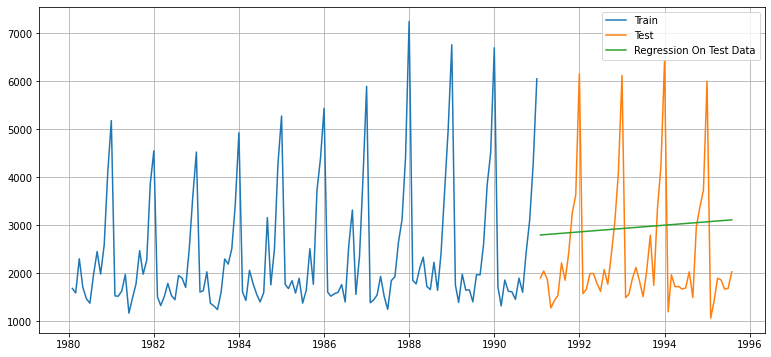

In [217]:
test_predictions_model1         = LR.predict(lr_test_spark[['time']])
lr_test_spark['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train_sparkling['Sparkling'], label='Train')
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(lr_test_spark['RegOnTime'], label='Regression On Test Data')
plt.legend(loc='best')
plt.grid();


In [218]:
rmse_model2_test = mean_squared_error(test_sparkling['Sparkling'],test_predictions_model1,squared=False)
print("For Regression On Time forecast on the Test Data the RMSE is %2.2f" %(rmse_model2_test))

For Regression On Time forecast on the Test Data the RMSE is 1391.45


In [219]:
train_time = [i+1 for i in range(len(train_rose))]
test_time = [i+134 for i in range(len(test_rose))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188]


In [220]:
lr_train = train_rose.copy()
lr_test = test_rose.copy()

In [221]:
lr_train['time'] = train_time
lr_test['time'] = test_time
print('First few rows of Training Data','\n',lr_train.head(),'\n')
print('Last few rows of Training Data','\n',lr_train.tail(),'\n')
print('First few rows of Test Data','\n',lr_test.head(),'\n')
print('Last few rows of Test Data','\n',lr_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   134
1991-02-28  55.0   135
1991-03-31  66.0   136
1991-04-30  65.0   137
1991-05-31  60.0   138 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   184
1995-04-30  52.0   185
1995-05-31  28.0   186
1995-06-30  40.0   187
1995-07-31  62.0   188 



In [222]:
LR.fit(lr_train[['time']],lr_train['Rose'].values)

LinearRegression()

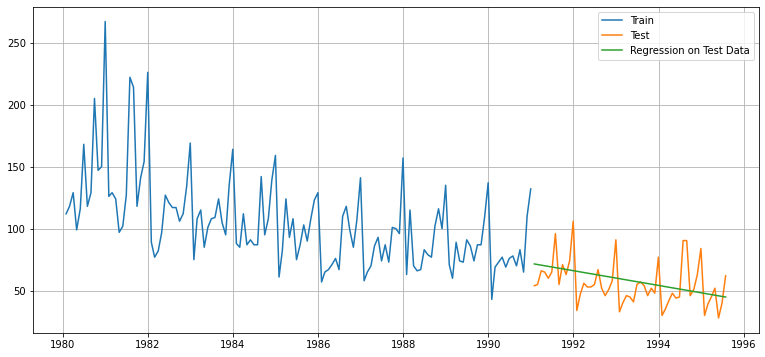

In [223]:
test_predictions_model1         = LR.predict(lr_test[['time']])
lr_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(lr_test['RegOnTime'], label='Regression on Test Data')
plt.legend(loc='best')
plt.grid();

In [224]:
rmse_model1_test = mean_squared_error(test_rose['Rose'],test_predictions_model1,squared=False)
print("For Regression On Timeforecast on the Test Data the RMSE is %2.2f" %(rmse_model1_test))

For Regression On Timeforecast on the Test Data the RMSE is 16.89


# NAIVE MODEL

In [225]:
naive_trainsp=train_sparkling.copy()
naive_testsp=test_sparkling.copy()


In [226]:
naive_testsp['naive'] = np.asarray(train_sparkling['Sparkling'])[len(np.asarray(train_sparkling['Sparkling']))-1]
naive_testsp['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

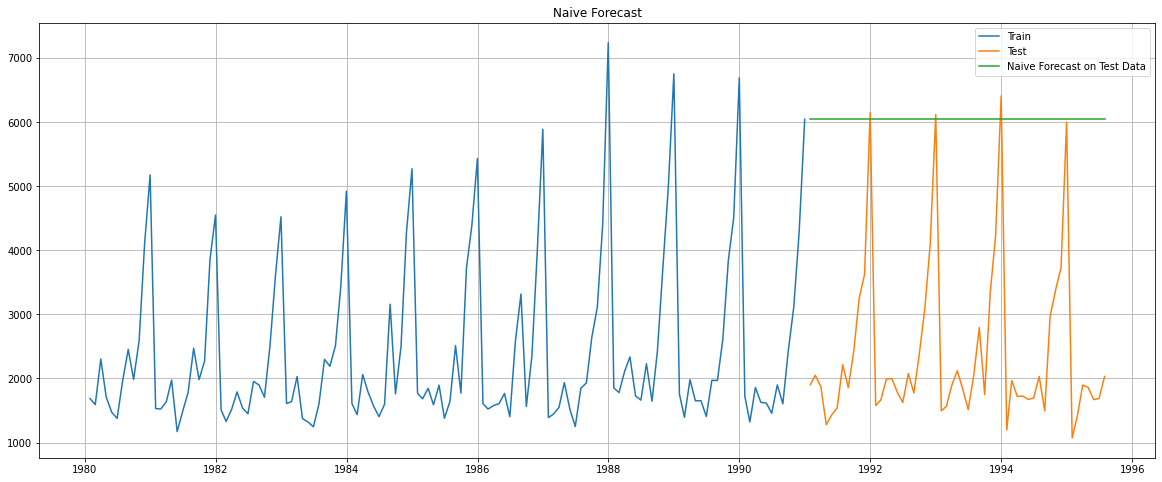

In [227]:
plt.figure()
plt.plot(naive_trainsp['Sparkling'], label='Train')
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(naive_testsp['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [228]:
rmse_model2_testsp = mean_squared_error(test_sparkling['Sparkling'],naive_testsp['naive'],squared=False)
print("For Naive forecast on the Test Data the value of RMSE is %2.2f" %(rmse_model2_testsp))

For Naive forecast on the Test Data the value of RMSE is 3864.28


In [229]:
naive_train=train_rose.copy()
naive_test=test_rose.copy()
naive_test['naive'] = np.asarray(train_rose['Rose'])[len(np.asarray(train_rose['Rose']))-1]
naive_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

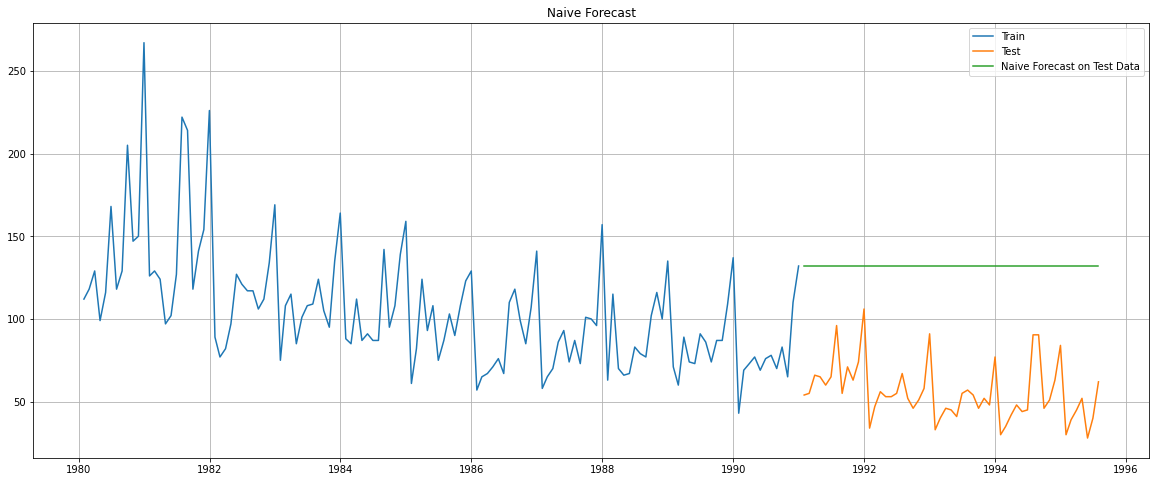

In [230]:
plt.figure()
plt.plot(naive_train['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(naive_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [231]:
rmse_model2_test = mean_squared_error(test_rose['Rose'],naive_test['naive'],squared=False)
print("For Naive forecast on the Test Data the value of RMSE is %2.2f" %(rmse_model2_test))

For Naive forecast on the Test Data the value of RMSE is 78.40


# SIMPLE AVERAGE

In [232]:
simple_average_trainsp=train_sparkling.copy()
simple_average_testsp=test_sparkling.copy()


In [233]:
simple_average_testsp['mean_forecast'] = train_sparkling['Sparkling'].mean()
simple_average_testsp.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

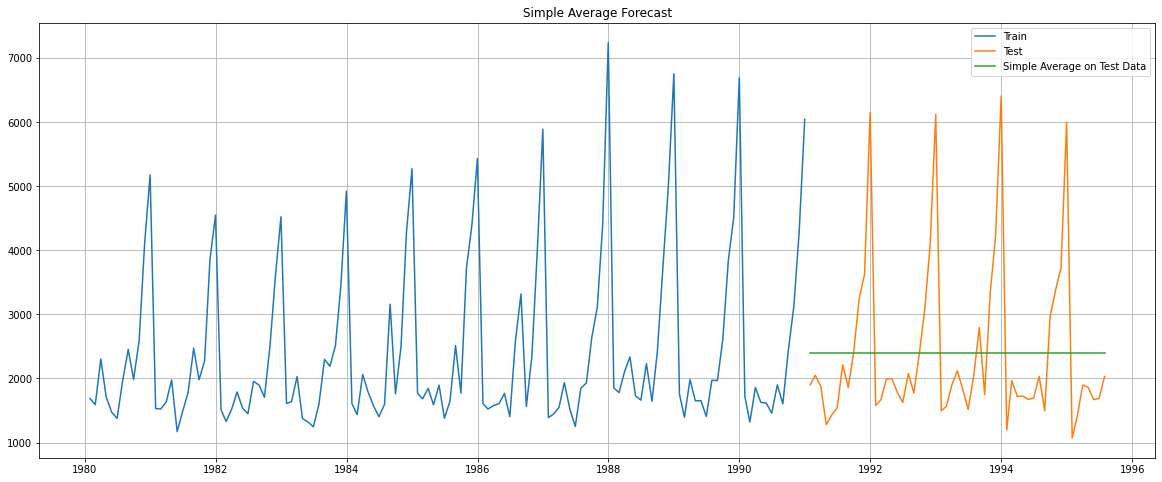

In [234]:
plt.figure()
plt.plot(simple_average_trainsp['Sparkling'], label='Train')
plt.plot(simple_average_testsp['Sparkling'], label='Test')
plt.plot(simple_average_testsp['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [235]:
rmse_movavg_testsp = mean_squared_error(test_rose['Rose'],simple_average_testsp['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data, the value of RMSE is %2.2f" %(rmse_movavg_testsp))

For Simple Average forecast on the Test Data, the value of RMSE is 2348.36


In [236]:
simpleaverage_train=train_rose.copy()
simpleaverage_test=test_rose.copy()

In [237]:
simpleaverage_test['mean_forecast'] = train_rose['Rose'].mean()
simpleaverage_test.head()

Rose  mean_forecast
Time_Stamp                     
1991-01-31  54.0     104.939394
1991-02-28  55.0     104.939394
1991-03-31  66.0     104.939394
1991-04-30  65.0     104.939394
1991-05-31  60.0     104.939394

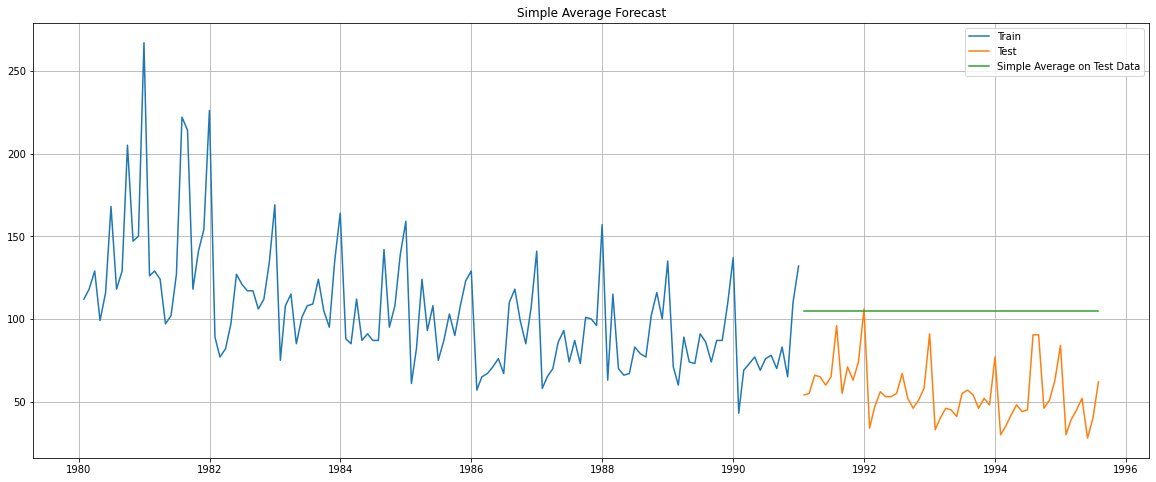

In [238]:
plt.figure()
plt.plot(simpleaverage_train['Rose'], label='Train')
plt.plot(simpleaverage_test['Rose'], label='Test')
plt.plot(simpleaverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [239]:
rmse_movavg_test = mean_squared_error(test_rose['Rose'],simpleaverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data value of RMSE is %2.2f" %(rmse_movavg_test))

For Simple Average forecast on the Test Data value of RMSE is 52.32


# Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [240]:
from statsmodels.tsa.stattools import adfuller

# SPARKLING STATIONARY CHECK

In [241]:
dftest = adfuller(df_sparkling,regression='ct')
print('test statistic is %2.2f' %dftest[0])
print('p-value is' ,dftest[1])
print('No.of lags used' ,dftest[2])

test statistic is -1.80
p-value is 0.7055958459932417
No.of lags used 12


In [242]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df_sparkling.diff().dropna(),regression='ct')
print('test statistic is %2.2f' %dftest[0])
print('p-value is' ,dftest[1])
print('No. of lags used' ,dftest[2])

test statistic is -44.91
p-value is 0.0
No. of lags used 10


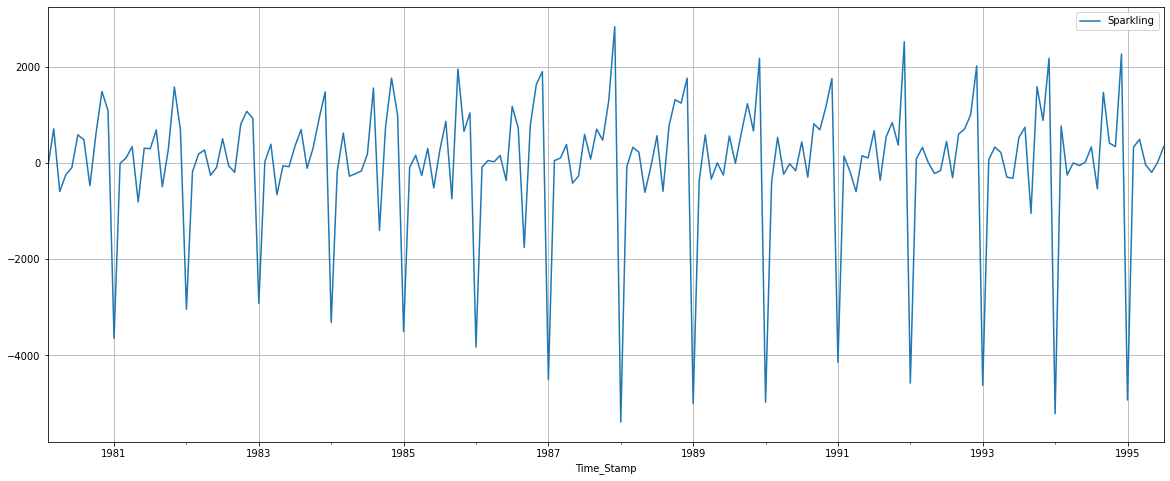

In [243]:
df_sparkling.diff().dropna().plot()
plt.grid()

In [244]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

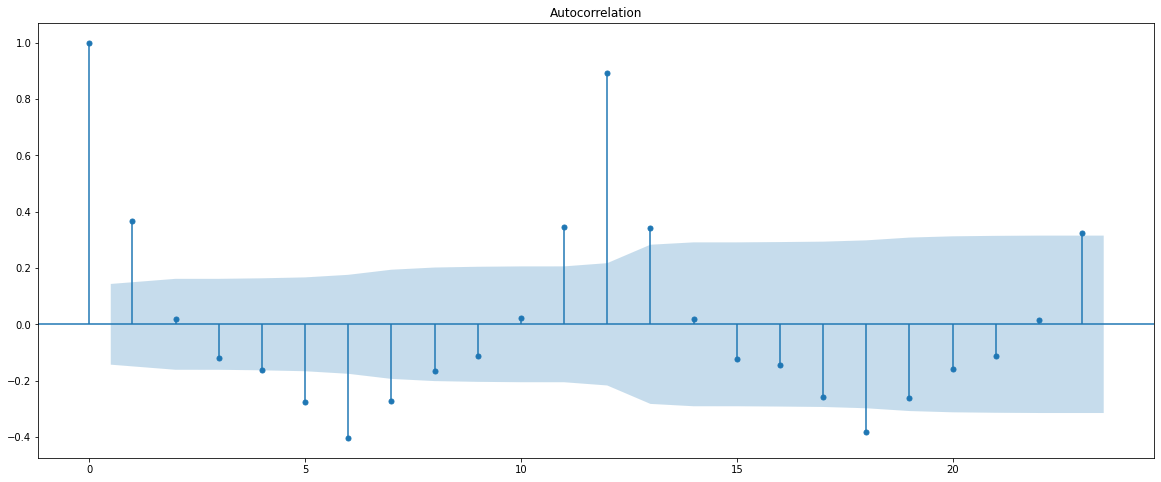

In [245]:
plot_acf(df_sparkling,alpha=0.05); ##acf 1

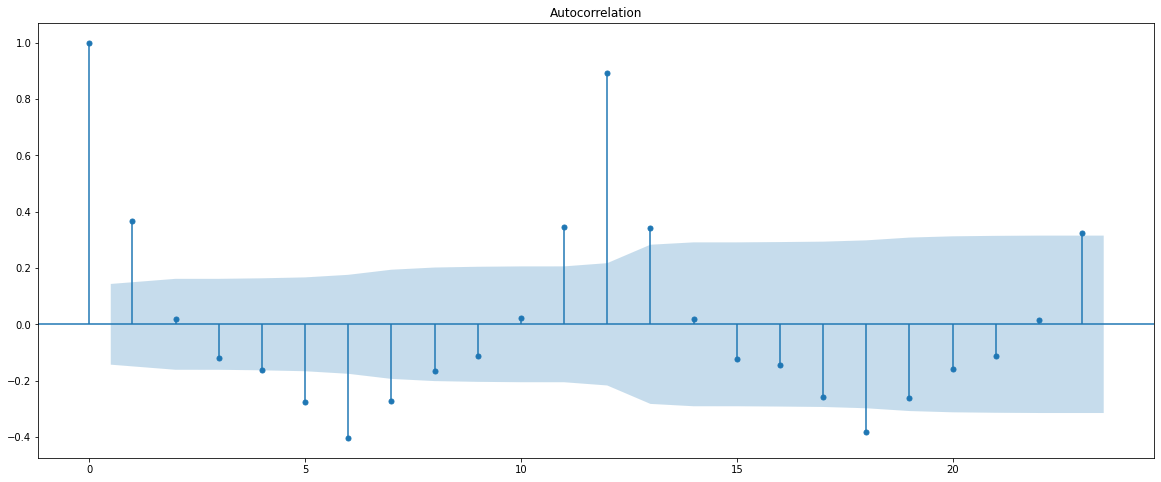

In [246]:
plot_acf(df_sparkling,alpha=0.05); 

In [247]:
plot_pacf(df_sparkling,zero=False,alpha=0.05);

In [248]:
plot_pacf(df_sparkling,zero=False,alpha=0.05,method='ywmle');   #pacf 1

# ROSE STATIONARY CHECK

In [249]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df_rose,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.443
DF test p-value is 0.3571250448455999
Number of lags used 12


In [250]:
dftest = adfuller(df_rose.diff().dropna(),regression='ct')
print('test statistic is %3.3f' %dftest[0])
print(' p-value is' ,dftest[1])
print('No. of lags used' ,dftest[2])
#This gives p value below value of significance


test statistic is -7.988
 p-value is 7.599609649114038e-11
No. of lags used 12


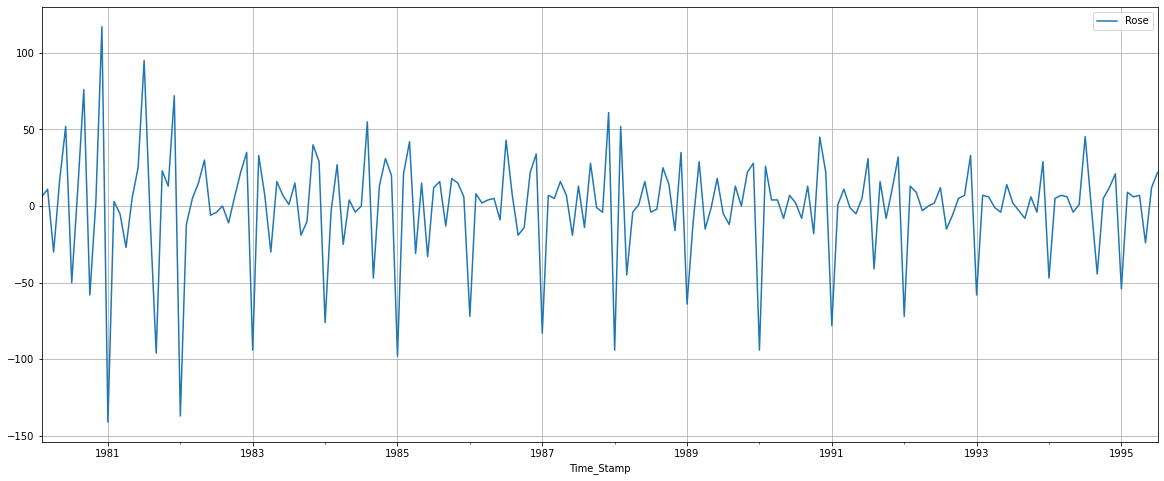

In [251]:
df_rose.diff().dropna().plot(grid=True);

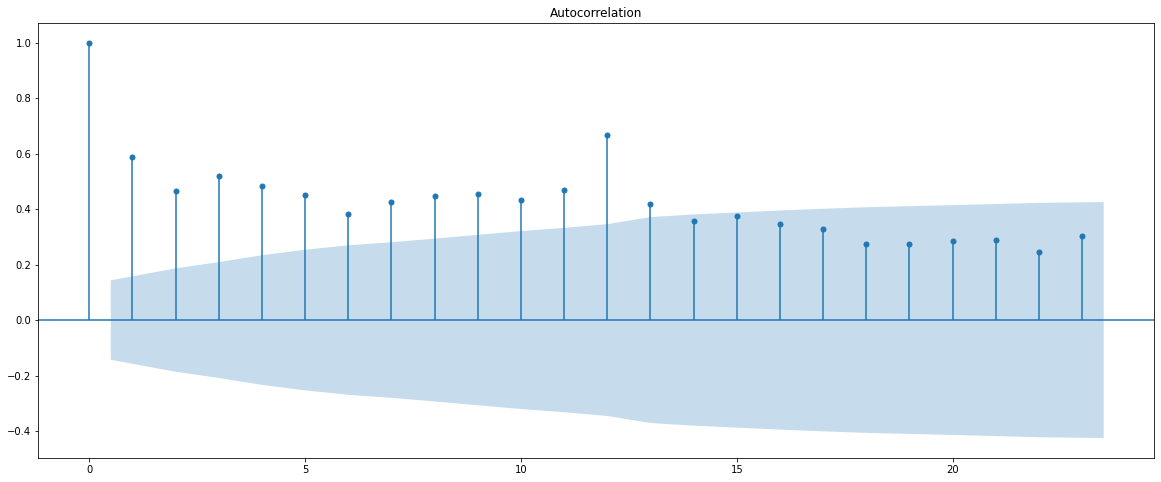

In [252]:
plot_acf(df_rose,alpha=0.05);  ##0

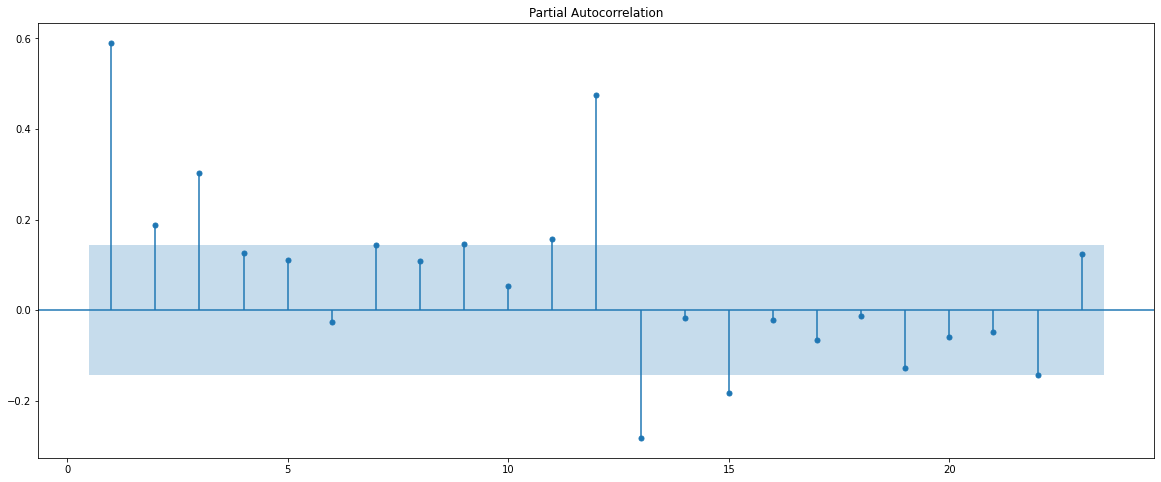

In [253]:
plot_pacf(df_rose,zero=False,alpha=0.05); ##3

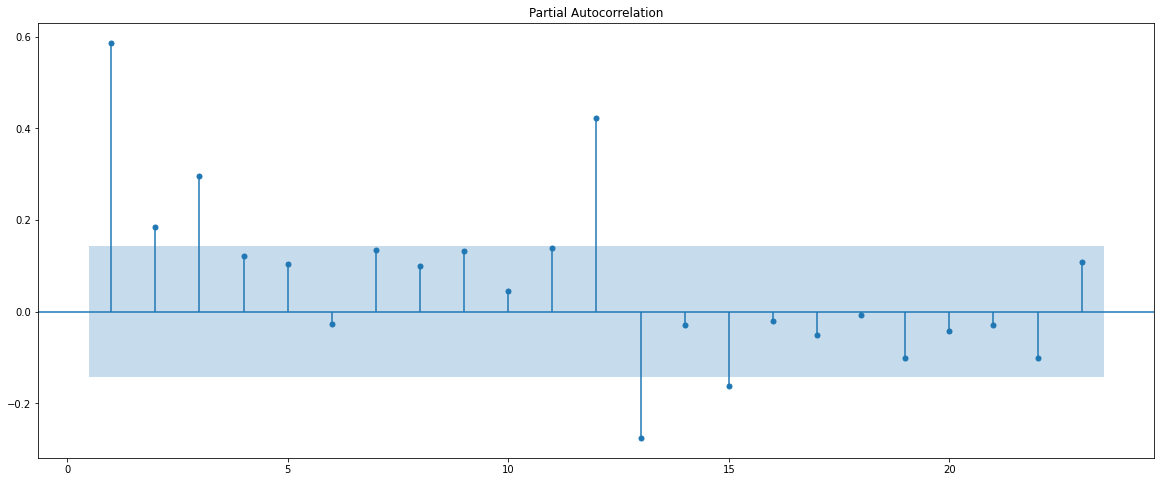

In [254]:
plot_pacf(df_rose,zero=False,alpha=0.05,method='ywmle');

# Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

## Sparkling dataset

In [273]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model are:')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model are:
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [274]:
sparkling_ARIMA_AIC = pd.DataFrame(columns=['spark_param', 'spark_AIC'])
sparkling_ARIMA_AIC

Empty DataFrame
Columns: [spark_param, spark_AIC]
Index: []

In [275]:
from statsmodels.tsa.arima_model import ARIMA

In [276]:
for params in pdq:
    sparkling_ARIMA_model = ARIMA(train_sparkling['Sparkling'].values,order=params).fit()
    print('ARIMA{} - AIC:{}'.format(params,sparkling_ARIMA_model.aic))
    sparkling_ARIMA_AIC = sparkling_ARIMA_AIC.append({'spark_param':params, 'spark_AIC': sparkling_ARIMA_model.aic}, ignore_index=True)

C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906438611577
ARIMA(0, 1, 2) - AIC:2232.78309768405
ARIMA(1, 1, 0) - AIC:2268.5280607650034


C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




ARIMA(1, 1, 1) - AIC:2235.0139453493175


C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




ARIMA(1, 1, 2) - AIC:2233.597647121205
ARIMA(2, 1, 0) - AIC:2262.035600155025


C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




ARIMA(2, 1, 1) - AIC:2232.3604899121387
ARIMA(2, 1, 2) - AIC:2210.6260491378257


C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




In [277]:
sparkling_ARIMA_AIC.sort_values(by='spark_AIC',ascending=True)    ### PARAM 212 is best

spark_param    spark_AIC
8   (2, 1, 2)  2210.626049
7   (2, 1, 1)  2232.360490
2   (0, 1, 2)  2232.783098
5   (1, 1, 2)  2233.597647
4   (1, 1, 1)  2235.013945
6   (2, 1, 0)  2262.035600
1   (0, 1, 1)  2264.906439
3   (1, 1, 0)  2268.528061
0   (0, 1, 0)  2269.582796

In [278]:
sparkling_auto_ARIMA = ARIMA(train_sparkling['Sparkling'], order=(2,1,2),freq='M')
sparkling_results_auto_ARIMA = sparkling_auto_ARIMA.fit()
print(sparkling_results_auto_ARIMA.summary())  ### after fiiting the results are as follows:-  as all valuea are les than 0.05 means all orders are signigifant

C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.313
Method:                       css-mle   S.D. of innovations           1013.755
Date:                Sun, 16 Jan 2022   AIC                           2210.626
Time:                        02:50:23   BIC                           2227.877
Sample:                    02-29-1980   HQIC                          2217.636
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5845      0.519     10.753      0.000       4.567       6.602
ar.L1.D.Sparkling     1.2698      0.075     17.040      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




In [261]:
sparkling_auto_ARIMA_test_predict = sparkling_results_auto_ARIMA.forecast(steps=len(test_sparkling))
sparkling_auto_ARIMA_rmse = mean_squared_error(test_sparkling['Sparkling'],sparkling_auto_ARIMA_test_predict[0],squared=False)
print(" ARIMA forecast of spark wine on the Test Data is  RMSE is %3.3f" %(sparkling_auto_ARIMA_rmse))

 ARIMA forecast of spark wine on the Test Data is  RMSE is 1374.037


# #ARIMA FOR ROSE

In [263]:
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [264]:
rose_ARIMA_AIC = pd.DataFrame(columns=['rose_param', 'rose_AIC'])
rose_ARIMA_AIC

Empty DataFrame
Columns: [rose_param, rose_AIC]
Index: []

In [265]:
import statsmodels.api as sm
for params in pdq:
    rose_ARIMA_model = ARIMA(train_rose['Rose'].values,order=params).fit()
    print('ARIMA{} - AIC:{}'.format(params,rose_ARIMA_model.aic))
    rose_ARIMA_AIC = rose_ARIMA_AIC.append({'rose_param':params, 'rose_AIC': rose_ARIMA_model.aic}, ignore_index=True)

C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.726183046448
ARIMA(0, 1, 2) - AIC:1276.8353734911866
ARIMA(1, 1, 0) - AIC:1319.3483105802602


C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




ARIMA(1, 1, 1) - AIC:1277.775753553521


C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




ARIMA(1, 1, 2) - AIC:1277.3592281129256
ARIMA(2, 1, 0) - AIC:1300.6092611744193


C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




ARIMA(2, 1, 1) - AIC:1279.0456894093354
ARIMA(2, 1, 2) - AIC:1279.2986939365205


C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




In [266]:
rose_ARIMA_AIC.sort_values(by='rose_AIC')

rose_param     rose_AIC
2  (0, 1, 2)  1276.835373
5  (1, 1, 2)  1277.359228
4  (1, 1, 1)  1277.775754
7  (2, 1, 1)  1279.045689
8  (2, 1, 2)  1279.298694
1  (0, 1, 1)  1280.726183
6  (2, 1, 0)  1300.609261
3  (1, 1, 0)  1319.348311
0  (0, 1, 0)  1335.152658

In [267]:
rose_auto_ARIMA = ARIMA(train_rose['Rose'], order=(0,1,2),freq='M')
rose_results_auto_ARIMA = rose_auto_ARIMA.fit()
print(rose_results_auto_ARIMA.summary())

C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Sun, 16 Jan 2022   AIC                           1276.835
Time:                        02:38:35   BIC                           1288.336
Sample:                    02-29-1980   HQIC                          1281.509
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4886      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

In [268]:
rose_auto_ARIMA_test_predict = rose_results_auto_ARIMA.forecast(steps=len(test_sparkling))
rose_auto_ARIMA_rmse = mean_squared_error(test_rose['Rose'],rose_auto_ARIMA_test_predict[0],squared=False)
print("ARIMA forecast of rose wine on the Test Data is RMSE is %3.3f" %(rose_auto_ARIMA_rmse))

ARIMA forecast of rose wine on the Test Data is RMSE is 17.280


# SARIMA FOR SPARKLNG

In [284]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

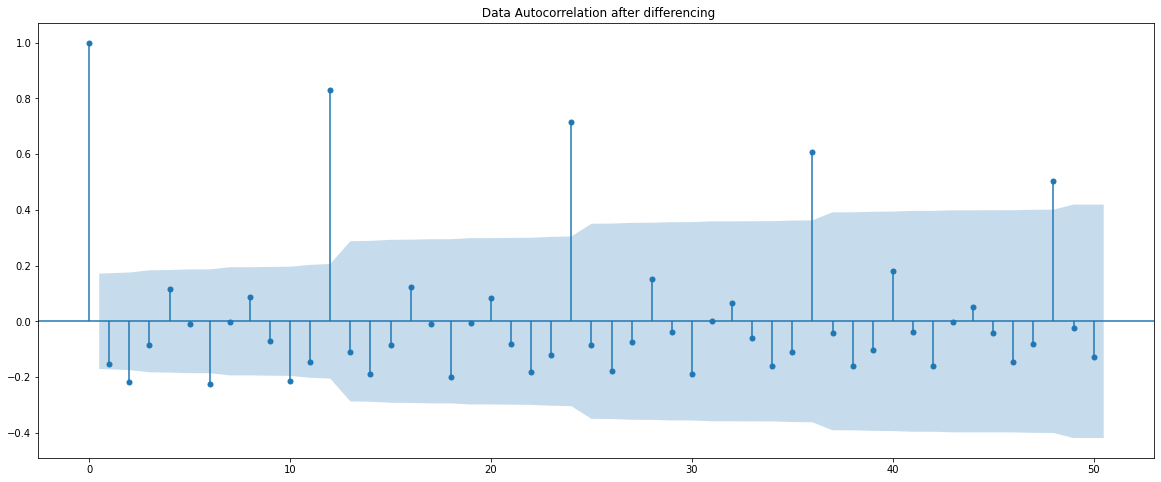

In [285]:
plot_acf(train_sparkling['Sparkling'].diff().dropna(),lags=50, title=' Data Autocorrelation after differencing')
plt.show()

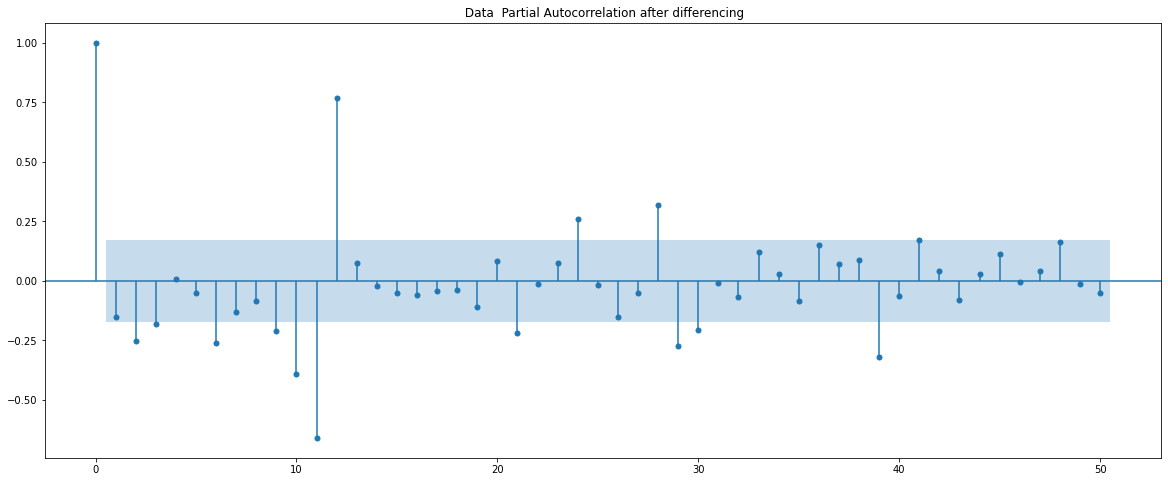

In [286]:
plot_pacf(train_sparkling['Sparkling'].diff().dropna(),lags=50, title=' Data  Partial Autocorrelation after differencing')
plt.show()

In [287]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [288]:
sparkling_SARIMA_AIC = pd.DataFrame(columns=['spark_param','spark_seasonal', 'spark_AIC'])
sparkling_SARIMA_AIC

Empty DataFrame
Columns: [spark_param, spark_seasonal, spark_AIC]
Index: []

In [289]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        sparkling_SARIMA_model = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'].values,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
        sparkling_results_SARIMA = sparkling_SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, sparkling_results_SARIMA.aic))
        sparkling_SARIMA_AIC = sparkling_SARIMA_AIC.append({'spark_param':param,'spark_seasonal':param_seasonal ,'spark_AIC': sparkling_results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616842675
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640235496
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389083
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791944
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158611443
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920774
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505853
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.768864956687
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.708957278316
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838032
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.090319373017
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.13196585489
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954176586
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245088165164
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018833130494
SARIMA(0, 1, 2)

In [290]:
sparkling_SARIMA_AIC.sort_values(by=['spark_AIC']).head()

spark_param spark_seasonal    spark_AIC
50   (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53   (1, 1, 2)  (2, 0, 2, 12)  1555.934563
26   (0, 1, 2)  (2, 0, 2, 12)  1557.121563
23   (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77   (2, 1, 2)  (1, 0, 2, 12)  1557.340404

In [291]:
spark_auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'].values,order=(1, 1, 2),seasonal_order=(1, 0, 2, 12),enforce_stationarity=False,enforce_invertibility=False)
spark_results_auto_SARIMA = spark_auto_SARIMA_6.fit(maxiter=1000)
print(spark_results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 16 Jan 2022   AIC                           1555.584
Time:                                    02:57:23   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



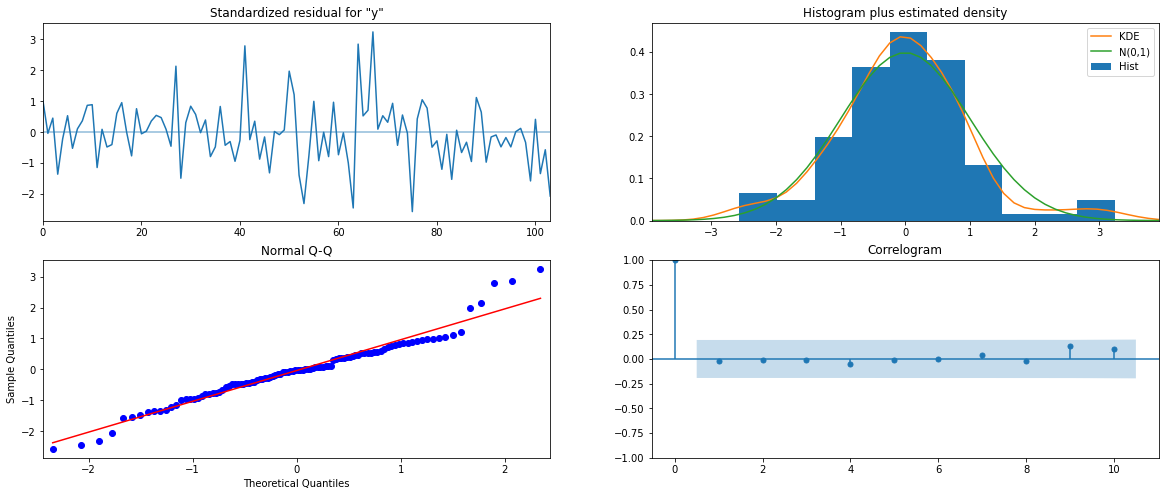

In [292]:
spark_results_auto_SARIMA.plot_diagnostics()
plt.show()

In [293]:
spark_auto_SARIMA_test_predict = spark_results_auto_SARIMA.get_forecast(steps=len(test_sparkling))

In [294]:
spark_auto_SARIMA_test_predict.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.391808  388.342295     566.254897    2088.528719
1  1315.124183  402.004779     527.209295    2103.039070
2  1621.595424  401.998386     833.693067    2409.497782
3  1598.879289  407.235895     800.711601    2397.046976
4  1392.696749  407.965802     593.098470    2192.295028

In [296]:
spark_acf_pacf_SARIMA_rmse = mean_squared_error(test_sparkling['Sparkling'],spark_auto_SARIMA_test_predict.predicted_mean,squared=False)
print("SARIMA forecast of Spark wine on the Test Data RMSE is %3.3f" %(spark_acf_pacf_SARIMA_rmse))

SARIMA forecast of Spark wine on the Test Data RMSE is 528.613


# SARIMA FOR ROSE

In [297]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [298]:
rose_SARIMA_AIC = pd.DataFrame(columns=['rose_param','rose_seasonal', 'rose_AIC'])
rose_SARIMA_AIC

Empty DataFrame
Columns: [rose_param, rose_seasonal, rose_AIC]
Index: []

In [299]:
for param in pdq:
    for param_seasonal in model_pdq:
        rose_SARIMA_model = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
        rose_results_SARIMA = rose_SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, rose_results_SARIMA.aic))
        rose_SARIMA_AIC = rose_SARIMA_AIC.append({'rose_param':param,'rose_seasonal':param_seasonal ,'rose_AIC': rose_results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207175
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380895
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386002
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635750373


C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697546
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945867
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918339
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383807
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491795
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094548
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483311407
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536075
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461666
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988257864924
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.667543054104
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.4866975264913
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.49384866177
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.8332843413673
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.540093355627
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913510973
SARIMA(0, 1, 2)x(2, 0, 0, 

In [300]:
rose_SARIMA_AIC.sort_values(by=['rose_AIC']).head()

rose_param  rose_seasonal    rose_AIC
26  (0, 1, 2)  (2, 0, 2, 12)  887.937509
53  (1, 1, 2)  (2, 0, 2, 12)  889.902650
80  (2, 1, 2)  (2, 0, 2, 12)  890.668798
69  (2, 1, 1)  (2, 0, 0, 12)  896.518161
78  (2, 1, 2)  (2, 0, 0, 12)  897.346444

In [301]:
rose_auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,order=(0, 1, 2),seasonal_order=(2, 0, 2, 12),enforce_stationarity=False,enforce_invertibility=False)
rose_results_auto_SARIMA = rose_auto_SARIMA_6.fit(maxiter=1000)
print(rose_results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 16 Jan 2022   AIC                            887.938
Time:                                    03:12:18   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.705     -0.004      0.996    -372.658     370.972
ma.L2         -0.1573     29.804   

In [302]:
rose_results_auto_SARIMA.plot_diagnostics()
plt.show()

C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



In [303]:
rose_auto_SARIMA_test_predict = rose_results_auto_SARIMA.get_forecast(steps=len(test_rose))

In [304]:
rose_auto_SARIMA_test_predict.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.867263  15.928500      31.647976      94.086550
1  70.541190  16.147658      38.892361     102.190019
2  77.356410  16.147656      45.707586     109.005235
3  76.208814  16.147656      44.559989     107.857638
4  72.747398  16.147656      41.098573     104.396222

In [305]:
rose_SARIMA_rmse = mean_squared_error(test_rose['Rose'],rose_auto_SARIMA_test_predict.predicted_mean,squared=False)
print("SARIMA forecast of Spark wine on the Test Data is RMSE is %3.3f" %(rose_SARIMA_rmse))

SARIMA forecast of Spark wine on the Test Data is RMSE is 26.417


# ## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

## SPARKLING SARIMA ARIMA ACFPACF

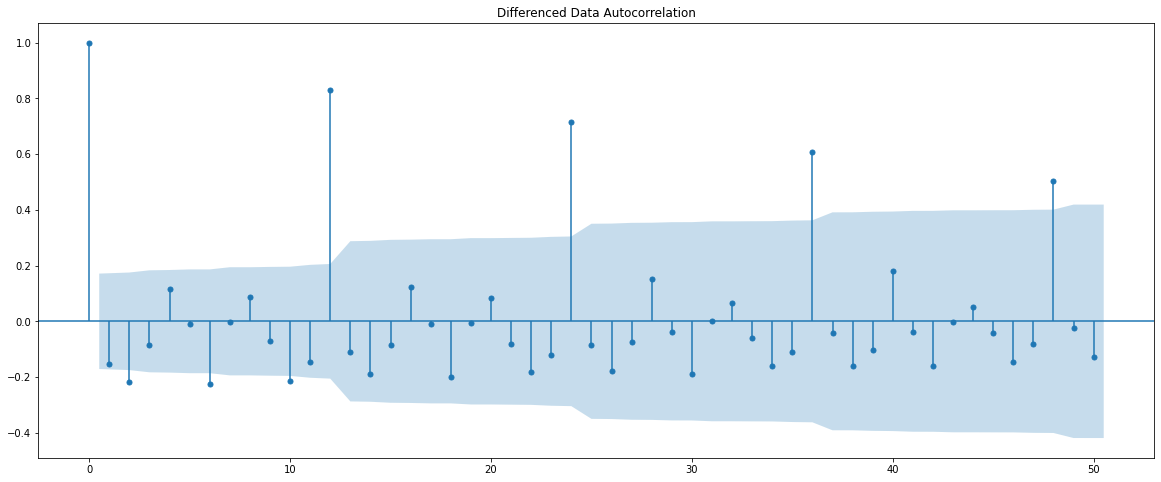

In [306]:
plot_acf(train_sparkling['Sparkling'].diff().dropna(),lags=50, title='Differenced Data Autocorrelation')
plot_pacf(train_sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [307]:
spark_acf_pacf_ARIMA = ARIMA(train_sparkling['Sparkling'].astype('float64'), order=(0,1,0),freq='M')
spark_results_acf_pacf_ARIMA = spark_acf_pacf_ARIMA.fit()
print(spark_results_acf_pacf_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.791
Method:                           css   S.D. of innovations           1377.911
Date:                Sun, 16 Jan 2022   AIC                           2269.583
Time:                        03:13:27   BIC                           2275.333
Sample:                    02-29-1980   HQIC                          2271.919
                         - 12-31-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2901    120.389      0.277      0.782    -202.667     269.248


C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




In [308]:
spark_acf_pacf_ARIMA_test_predict = spark_results_acf_pacf_ARIMA.forecast(steps=len(test_sparkling))
spark_acf_pacf_ARIMA_rmse =mean_squared_error(test_sparkling['Sparkling'],spark_acf_pacf_ARIMA_test_predict[0],squared=False)
print("For acf_pcf ARIMA forecast of sparkling wine on the Test Data,  RMSE is %3.3f" %(spark_acf_pacf_ARIMA_rmse))

For acf_pcf ARIMA forecast of sparkling wine on the Test Data,  RMSE is 4779.154


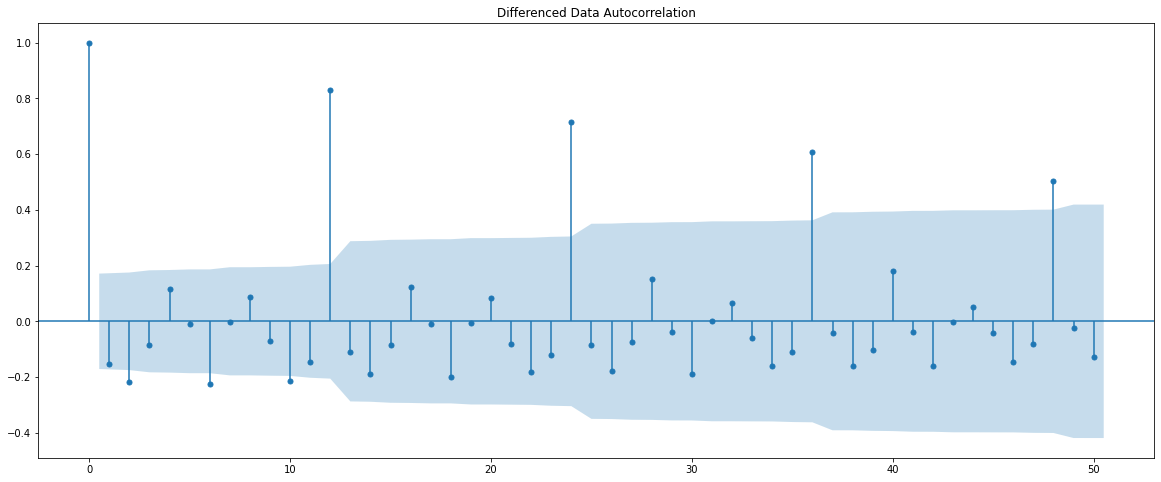

In [309]:
plot_acf(train_sparkling['Sparkling'].diff().dropna(),lags=50, title='Differenced Data Autocorrelation')
plt.show()

## SARIMA

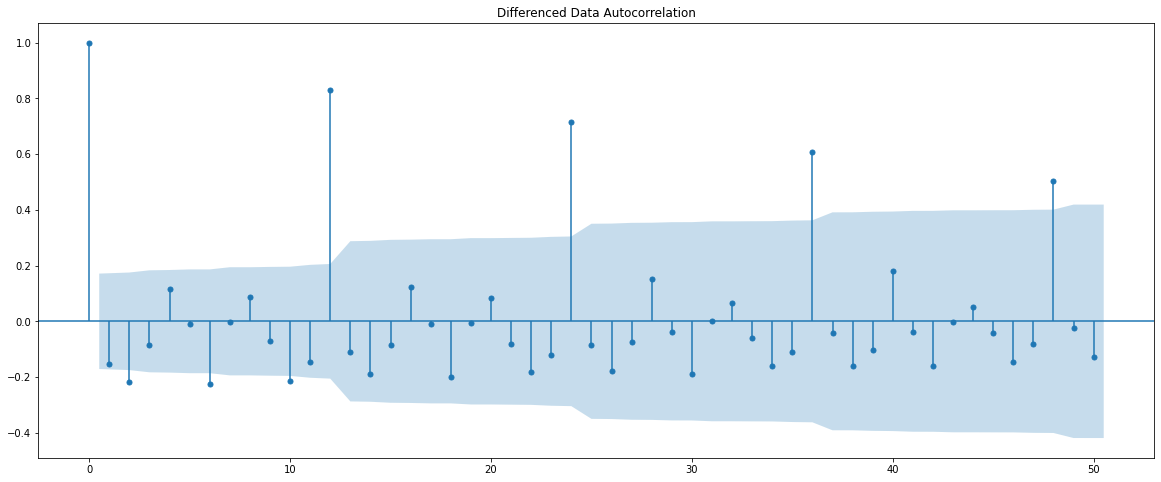

In [310]:
plot_acf(train_sparkling['Sparkling'].diff().dropna(),lags=50, title='Differenced Data Autocorrelation')
plt.show()

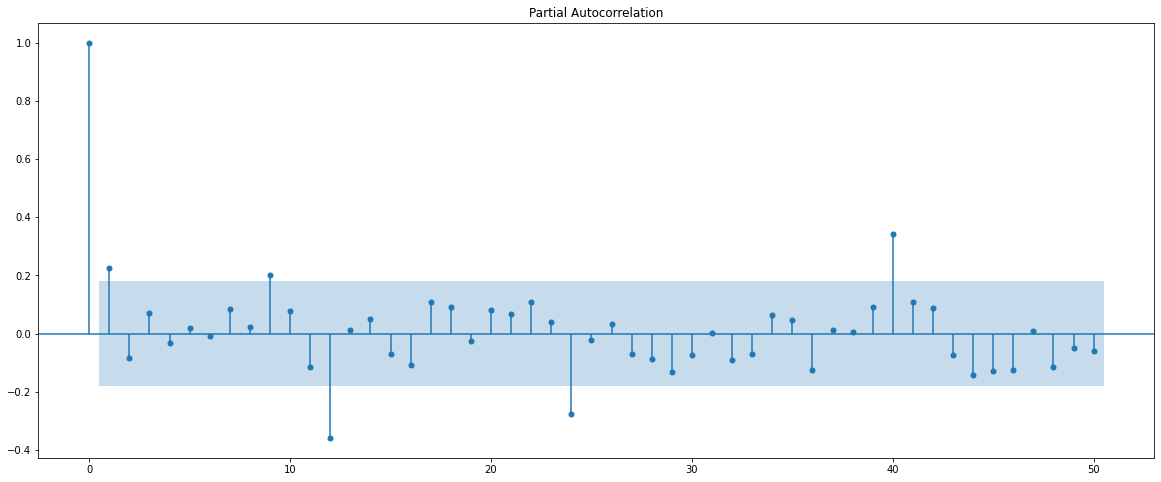

In [311]:
plot_acf(train_sparkling['Sparkling'].diff(12).dropna(),lags=50) # Stationary data for SARIMA
plot_pacf(train_sparkling['Sparkling'].diff(12).dropna(),lags=50);

In [312]:
spark_acf_pacf_SARIMA = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'].values,order=(1, 1, 1),seasonal_order=(2, 0, 1, 12),enforce_stationarity=False,enforce_invertibility=False)
spark_results_acf_pacf_SARIMA = spark_acf_pacf_SARIMA.fit(maxiter=1000)
print(spark_results_acf_pacf_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(2, 0, 1, 12)   Log Likelihood                -787.157
Date:                            Sun, 16 Jan 2022   AIC                           1586.314
Time:                                    03:15:25   BIC                           1602.295
Sample:                                         0   HQIC                          1592.791
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0944      0.131      0.723      0.470      -0.162       0.350
ma.L1         -1.1067      0.085   

In [313]:
spark_results_acf_pacf_SARIMA.plot_diagnostics()
plt.show()

C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



In [314]:
spark_acf_pacf_SARIMA_test_predict = spark_results_acf_pacf_SARIMA.get_forecast(steps=len(test_sparkling))

In [315]:
spark_acf_pacf_SARIMA_test_predict.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1404.543320  396.928994     626.576787    2182.509852
1  1173.415045  404.087672     381.417761    1965.412329
2  1665.426616  406.630722     868.445046    2462.408187
3  1531.128992  408.850283     729.797163    2332.460821
4  1397.523152  411.029993     591.919169    2203.127135

In [316]:
spark_acf_pacf_SARIMA_rmse = mean_squared_error(test_sparkling['Sparkling'],spark_acf_pacf_SARIMA_test_predict.predicted_mean,squared=False)
print("For acf_pacf SARIMA forecast of Spark wine on the Test Data is MSE is %3.3f" %(spark_acf_pacf_SARIMA_rmse))

For acf_pacf SARIMA forecast of Spark wine on the Test Data is MSE is 572.806


# ROSE ARIMA SARIMA PACF 

In [317]:
plot_acf(train_rose['Rose'].diff().dropna(),lags=50, title='Differenced Data Autocorrelation')
plot_pacf(train_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [318]:
rose_acf_pacf_ARIMA = ARIMA(train_rose['Rose'].astype('float64'), order=(2,1,2),freq='M')
rose_results_acf_pacf_ARIMA = rose_acf_pacf_ARIMA.fit()
print(rose_results_acf_pacf_ARIMA.summary())

C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -633.649
Method:                       css-mle   S.D. of innovations             29.975
Date:                Sun, 16 Jan 2022   AIC                           1279.299
Time:                        03:16:40   BIC                           1296.550
Sample:                    02-29-1980   HQIC                          1286.309
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4911      0.081     -6.076      0.000      -0.649      -0.333
ar.L1.D.Rose    -0.4383      0.218     -2.015      0.044      -0.865      -0.012
ar.L2.D.Rose     0.0269      0.109      0.24

C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




In [319]:
rose_acf_pacf_ARIMA_test_predict = rose_results_acf_pacf_ARIMA.forecast(steps=len(test_rose))
rose_acf_ARIMA_rmse =mean_squared_error(test_rose['Rose'],rose_acf_pacf_ARIMA_test_predict[0],squared=False)
print("For acf_pcf ARIMA forecast of rose wine on the Test Data,  RMSE is %3.3f" %(rose_acf_ARIMA_rmse))

For acf_pcf ARIMA forecast of rose wine on the Test Data,  RMSE is 17.076


# SARIMA for rose

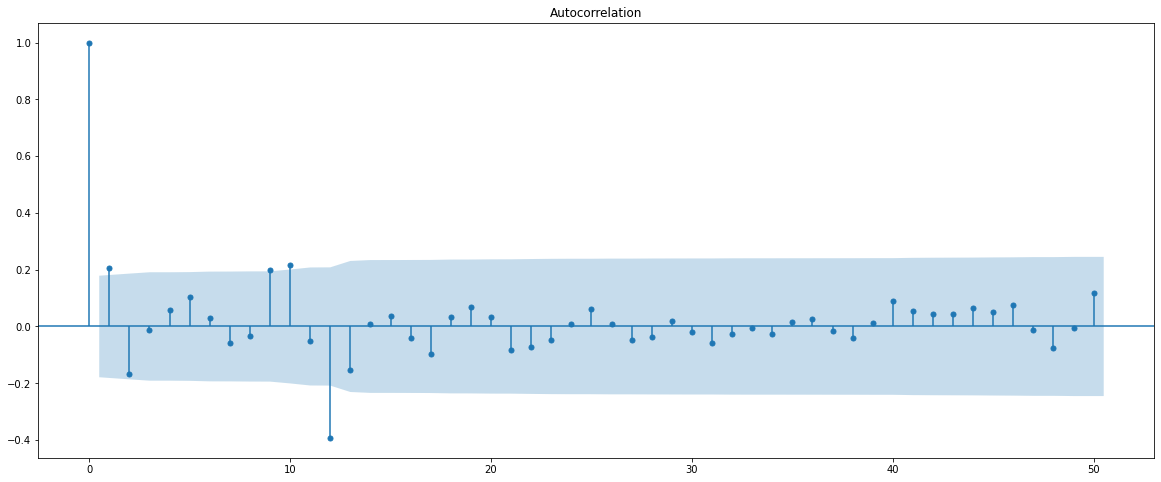

In [320]:
plot_acf(train_rose['Rose'].diff(12).dropna(),lags=50) # Stationary data for SARIMA
plot_pacf(train_rose['Rose'].diff(12).dropna(),lags=50);

In [321]:
rose_acf_pacf_SARIMA = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,order=(2, 1, 1),seasonal_order=(2, 0, 1, 12),enforce_stationarity=False,enforce_invertibility=False)
rose_results_acf_pacf_SARIMA = rose_acf_pacf_SARIMA.fit(maxiter=1000)
print(rose_results_acf_pacf_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 1, 1)x(2, 0, 1, 12)   Log Likelihood                -441.820
Date:                            Sun, 16 Jan 2022   AIC                            897.640
Time:                                    03:17:24   BIC                            916.218
Sample:                                         0   HQIC                           905.168
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1652      0.120      1.377      0.168      -0.070       0.400
ar.L2         -0.1225      0.092   

C:\Users\Kinshuk\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



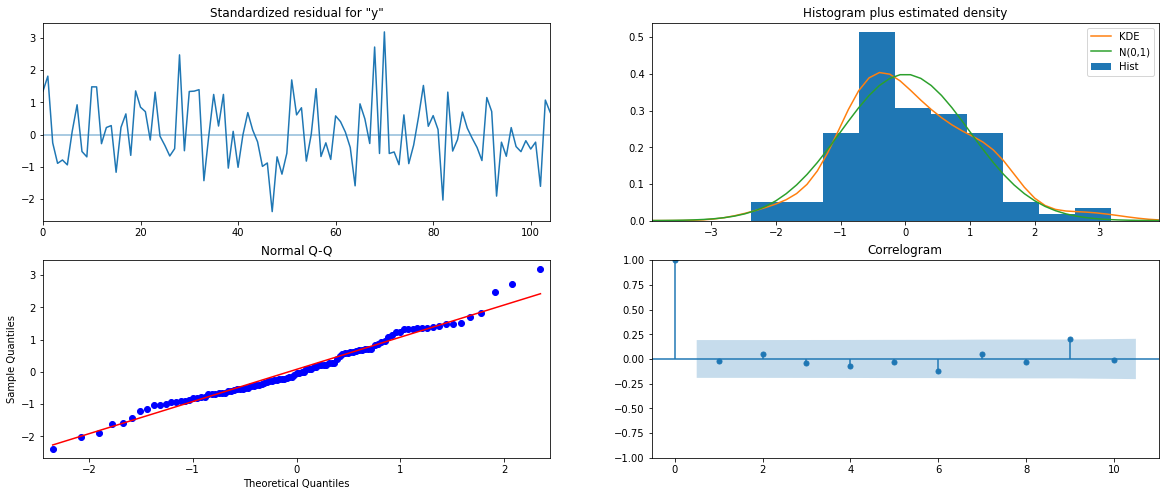

In [322]:
rose_results_acf_pacf_SARIMA.plot_diagnostics()
plt.show()

In [323]:
rose_acf_pacf_SARIMA_test_predict = rose_results_acf_pacf_SARIMA.get_forecast(steps=len(test_rose))

In [324]:
rose_acf_pacf_SARIMA_test_predict.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.509721  15.991662      31.166639      93.852803
1  67.173964  16.232148      35.359538      98.988389
2  78.443330  16.287519      46.520379     110.366281
3  77.481206  16.292177      45.549125     109.413287
4  73.600434  16.293277      41.666198     105.534670

In [325]:
rose_acf_pacf_SARIMA_rmse = mean_squared_error(test_rose['Rose'],rose_acf_pacf_SARIMA_test_predict.predicted_mean,squared=False)
print("For acf_pacf SARIMA forecast of Rose wine on the Test Data,  RMSE is %3.3f" %(rose_acf_pacf_SARIMA_rmse))

For acf_pacf SARIMA forecast of Rose wine on the Test Data,  RMSE is 27.353


#  8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [359]:
Sparkling_data = {'Model Name': ['SS','DES', 'TES additive', 'TES Multiplicative', 'LR','Naive','Simple_avg','sparkling_ARIMA(2,1,2)','Sparkling_SARIMA(1,1,2)(1,0,2,12)',' Sparkling ARIMA ACFPACF(0,1,0)','Sparkling SARIMA ACFPACF(1,1,1)(2,0,1,12)'],
    'RMSE': [1338.0083844916467, 5291.8798332269125, 378.6260083329619, 2408.798909524524, 1391.455,3864.279,2348.355,1374.037,528.613,4779.154,572.806]
        }

Sparkling_df = pd.DataFrame(Sparkling_data)
round(Sparkling_df,3)

Model Name      RMSE
0                                          SS  1338.008
1                                         DES  5291.880
2                                TES additive   378.626
3                          TES Multiplicative  2408.799
4                                          LR  1391.455
5                                       Naive  3864.279
6                                  Simple_avg  2348.355
7                      sparkling_ARIMA(2,1,2)  1374.037
8           Sparkling_SARIMA(1,1,2)(1,0,2,12)   528.613
9              Sparkling ARIMA ACFPACF(0,1,0)  4779.154
10  Sparkling SARIMA ACFPACF(1,1,1)(2,0,1,12)   572.806

In [360]:
Rose_data = {'Model Name': ['SS','DES', 'TES additive', 'TES Multiplicative', 'LR','Naive','Simple_avg','rose_ARIMA(0,1,2)','rose_SARIMA(0,1,2)(2,0,2,12)','rose ARIMA ACFPACF(2,1,2)','rose SARIMA ACFPACF(2,1,1)(2,0,1,12)'],
        'RMSE': [35.93621071651502,16.979407626324168, 15.543482483216644, 19.029100042777717, 16.892,78.396,52.319,17.280,26.417,17.076,27.353]
        }

Rose_df = pd.DataFrame(Rose_data)
round(Rose_df,3)

Model Name    RMSE
0                                     SS  35.936
1                                    DES  16.979
2                           TES additive  15.543
3                     TES Multiplicative  19.029
4                                     LR  16.892
5                                  Naive  78.396
6                             Simple_avg  52.319
7                      rose_ARIMA(0,1,2)  17.280
8           rose_SARIMA(0,1,2)(2,0,2,12)  26.417
9              rose ARIMA ACFPACF(2,1,2)  17.076
10  rose SARIMA ACFPACF(2,1,1)(2,0,1,12)  27.353

# 9 Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [367]:
Sparkling_full_model = ExponentialSmoothing(df_sparkling, trend='additive',seasonal='additive',initialization_method='estimated',freq='M')

In [371]:
Sparkling_full_model_autofit =Sparkling_full_model.fit(smoothing_level = 0.25, smoothing_trend= 0.00, smoothing_seasonal= 0.74 )

In [372]:
Sparkling_full_model_predict = Sparkling_full_model_autofit.forecast(steps= 12)
Sparkling_full_model_predict

1995-08-31    1723.716112
1995-09-30    2779.828486
1995-10-31    3196.366738
1995-11-30    3664.061974
1995-12-31    5988.765046
1996-01-31    1066.389885
1996-02-29    1503.159425
1996-03-31    1910.294864
1996-04-30    1855.569875
1996-05-31    1685.345440
1996-06-30    1697.495931
1996-07-31    2010.958957
Freq: M, dtype: float64

In [374]:
predict_Sparkling_final = pd.DataFrame({'Lower_CI':Sparkling_full_model_predict - 1.96*np.std(Sparkling_full_model_autofit.resid,ddof=1), 'Prediction':Sparkling_full_model_predict,'Upper_CI': Sparkling_full_model_predict + 1.96*np.std(Sparkling_full_model_autofit.resid,ddof=1)})
predict_Sparkling_final.head()

Lower_CI   Prediction     Upper_CI
1995-08-31   914.365989  1723.716112  2533.066235
1995-09-30  1970.478363  2779.828486  3589.178609
1995-10-31  2387.016615  3196.366738  4005.716861
1995-11-30  2854.711851  3664.061974  4473.412097
1995-12-31  5179.414923  5988.765046  6798.115169

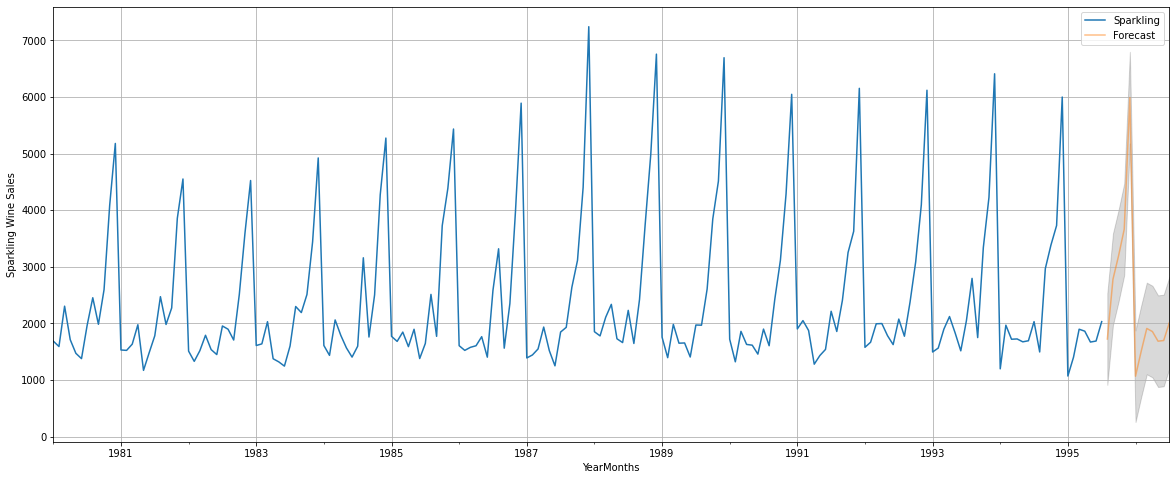

In [375]:
axis = df_sparkling.plot(label='Actual')
predict_Sparkling_final['Prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(predict_Sparkling_final.index, predict_Sparkling_final['Lower_CI'], predict_Sparkling_final['Upper_CI'], color='k', alpha=.15)
axis.set_xlabel('YearMonths')
axis.set_ylabel('Sparkling Wine Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

In [376]:
rose_full_model = ExponentialSmoothing(df_rose, trend='additive',seasonal='additive',initialization_method='estimated',freq='M')

In [377]:
rose_full_model_autofit = rose_full_model.fit(smoothing_level = 0.25, smoothing_trend= 0.00, smoothing_seasonal= 0.74 )

In [378]:
rose_full_model_predict = rose_full_model_autofit.forecast(steps= 12)
rose_full_model_predict

1995-08-31    65.998165
1995-09-30    24.473144
1995-10-31    31.199255
1995-11-30    41.002142
1995-12-31    63.454248
1996-01-31    12.019173
1996-02-29    21.814531
1996-03-31    28.638924
1996-04-30    35.443958
1996-05-31    16.170817
1996-06-30    29.089435
1996-07-31    67.798477
Freq: M, dtype: float64

In [379]:
predict_rose_final = pd.DataFrame({'Lower_CI':rose_full_model_predict - 1.96*np.std(rose_full_model_autofit.resid,ddof=1), 'Prediction':rose_full_model_predict,'Upper_CI': rose_full_model_predict + 1.96*np.std(rose_full_model_autofit.resid,ddof=1)})
predict_rose_final.head()

Lower_CI  Prediction    Upper_CI
1995-08-31  23.393698   65.998165  108.602632
1995-09-30 -18.131323   24.473144   67.077611
1995-10-31 -11.405212   31.199255   73.803722
1995-11-30  -1.602325   41.002142   83.606609
1995-12-31  20.849781   63.454248  106.058715

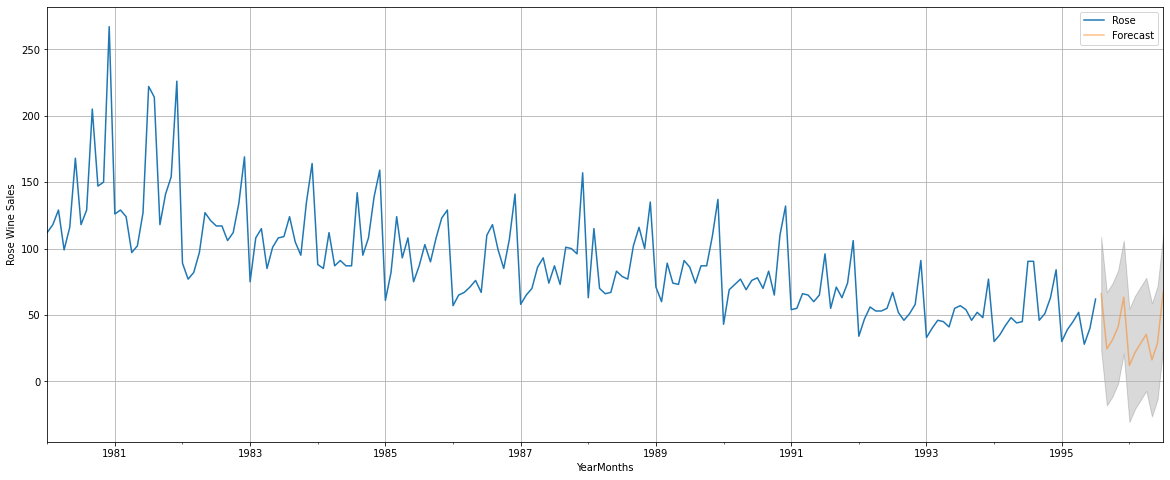

In [380]:
axis = df_rose.plot(label='Actual')
predict_rose_final['Prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(predict_rose_final.index, predict_rose_final['Lower_CI'], predict_rose_final['Upper_CI'], color='k', alpha=.15)
axis.set_xlabel('YearMonths')
axis.set_ylabel('Rose Wine Sales')
plt.legend(loc='best')
plt.grid()
plt.show()